# What is the significance of hospital occupancy, racial demographics and temperature in affecting the infection rate and fatality rate in the US states?
### 1) What is the correlation between hospital occupancy in different US states and their respective COVID-19                fatality rates? 
### 2) What is the correlation between racial demographics and infection rate of COVID-19? 
### 3) What is the correlation between the temperature of different US states and the COVID-19 fatality rate? 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Regression related
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

# Data Extraction

#### Population Dataset (Self-sourced)
- Extracted from the Tableau Population Dataset
- Displays proportion of racial demographics in each US state 

In [2]:
#Import population Dataset
population = pd.read_csv('population_final.csv')
population.head()

,State,American Indian and Alaska Native alone,Asian alone,Black or African American alone,Native Hawaiian and Other Pacific Islander alone,Proportion American Indian or Alaska Native alone,Proportion Asian alone,Proportion Black or African American alone,Proportion Native Hawaiian And Other Pacific Islander alone,Proportion Some other race alone,Proportion Two or More Races alone,Proportion White alone,Some other race alone,Total Population,Two or more races,White alone
0,Alabama,23265,66129,1319551,1892,0.004745,0.013487,0.269121,0.000386,0.015184,0.018666,0.678411,74451,4903185,91522,3326375
1,Alaska,115544,43678,22551,9923,0.157945,0.059707,0.030827,0.013564,0.017227,0.078568,0.642163,12602,731545,57476,469771
2,Arizona,332273,241721,343729,14168,0.045650,0.033209,0.047224,0.001946,0.050070,0.038547,0.783354,364442,7278717,280574,5701810
3,Arkansas,17216,46078,467468,12829,0.005705,0.015269,0.154903,0.004251,0.025048,0.027703,0.767121,75590,3017804,83603,2315020
4,California,321112,5865435,2282144,155871,0.008127,0.148446,0.057758,0.003945,0.137288,0.050064,0.594372,5424558,39512223,1978145,23484958


#### Races Dataset
- Extracted from the COVID Tracking Project
- Displays data including number of cases, hospitalisations broken down by race and ethnicity

In [3]:
#Import races covid Dataset

popgotcovid = pd.read_csv('races-COVID.csv',header=1)
popgotcovid.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Daily Covid Dataset
- Extracted from the COVID Tracking Project
- Displays a wide range of data including the number of positive and negative cases, number of people currently hospitalised, number of deaths confirmed

In [4]:
#Import daily covid Dataset

coviddata = pd.read_csv('dailycovid.csv')
coviddata.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


# Data Cleaning

# Cleaning coviddata dataset

### Unnececessary colums were dropped
    Relevant Colums: date, state, positive, HospitalisedCurrently, death 

In [5]:
to_drop = ['commercialScore',
           'negativeRegularScore',
           'negativeScore',
           'positiveScore',
           'score',
           'grade',
           'negativeIncrease',
           'total',
           'totalTestResultsIncrease',
           'posNeg',
           'dataQualityGrade',
           'deathIncrease',
           'hospitalizedIncrease',
           'hash',
           'positiveTestsPeopleAntibody',
           'negativeTestsPeopleAntibody',
           'totalTestsPeopleAntigen',
           'positiveTestsPeopleAntigen',
           'totalTestsAntigen',
           'positiveTestsAntigen',
           'fips',           
           'positiveIncrease',
           'deathConfirmed',
           'deathProbable',
           'totalTestEncountersViral',
           'totalTestsPeopleViral',
           'totalTestsAntibody',
           'positiveTestsAntibody',
           'negativeTestsAntibody',
           'totalTestsPeopleAntibody',
           'probableCases',
           'negative',
           'pending',
           'totalTestResultsSource',
           'totalTestResults',
           'inIcuCurrently',
           'inIcuCumulative',
           'onVentilatorCurrently',
           'recovered',
           'lastUpdateEt',
           'dateModified',
           'checkTimeEt',
           'dateChecked',
           'totalTestsViral',
           'positiveTestsViral',
           'positiveCasesViral',
           'onVentilatorCumulative',
           'negativeTestsViral',
            'hospitalized',
            'hospitalizedDischarged',
            'hospitalizedCumulative']

coviddata.drop(to_drop, inplace=True, axis=1)

### We need to check the data remains consistent by checking for Null values and removing them
    Null values will distort the accuracy of our data, and replacing them with 0 may lead to skew in our values, hence we chose to remove the NaN rows completely instead.

In [6]:
coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   20780 non-null  int64  
 1   state                  20780 non-null  object 
 2   positive               20584 non-null  float64
 3   hospitalizedCurrently  17338 non-null  float64
 4   death                  19909 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 811.8+ KB


In [7]:
coviddata.isnull().sum()

date                        0
state                       0
positive                  196
hospitalizedCurrently    3442
death                     871
dtype: int64

#### Since we found Null values above, we now drop them from the dataset

In [8]:
coviddata = coviddata.dropna(how='any',axis=0)

### Ned to reset the indexes of the data
    - Gives us consecutive number
    - Allows us to access data in the Dataframe via a for loop

In [9]:
coviddata = coviddata.reset_index(drop=True)

#### After dropping Null Values, we now have 17334 rows of complete data consistent for all columns

In [10]:
coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17334 entries, 0 to 17333
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   17334 non-null  int64  
 1   state                  17334 non-null  object 
 2   positive               17334 non-null  float64
 3   hospitalizedCurrently  17334 non-null  float64
 4   death                  17334 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 677.2+ KB


### Add 2 columns: "proportion_hospitalised" & "Death_rate", both needed in data analysis
    1. proportion_hospitalised = number of patients currently hospitalised/number of positive cases
    2. Death_rate = number of deaths/number of positive cases
    
    Note: Both values are in percentage (%)
     
### For-loop is used to generate the data for these new columns
    1. 2 new lists are made
    2. The loop accesses each value by consecutive index, calculates the result, then appends it to the appropriate list
    3. The .assign function adds the data from each list to coviddata table to form the 2 new columns required

In [11]:
current_proportion_hospitalised = []
death_rate = []

for x in range(0,17334):
    current_proportion_hospitalised.append(coviddata.hospitalizedCurrently[x]/coviddata.positive[x] * 100)
    death_rate.append(coviddata.death[x]/coviddata.positive[x] * 100)
    
coviddata = coviddata.assign(Proportion_hospitalised=current_proportion_hospitalised, Death_rate = death_rate)

coviddata

,date,state,positive,hospitalizedCurrently,death,Proportion_hospitalised,Death_rate
0,20210307,AK,56886.0,33.0,305.0,0.058011,0.536160
1,20210307,AL,499819.0,494.0,10148.0,0.098836,2.030335
2,20210307,AR,324818.0,335.0,5319.0,0.103135,1.637532
3,20210307,AZ,826454.0,963.0,16328.0,0.116522,1.975670
4,20210307,CA,3501394.0,4291.0,54124.0,0.122551,1.545784
...,...,...,...,...,...,...,...
17329,20200321,NY,10356.0,1436.0,44.0,13.866358,0.424874
17330,20200320,NY,7102.0,1042.0,35.0,14.671923,0.492819
17331,20200319,NY,4152.0,617.0,12.0,14.860308,0.289017
17332,20200318,NY,2383.0,416.0,12.0,17.456987,0.503567


# Cleaning population dataset
### Unnececessary colums were dropped
    Relevant Colums: date, state, positive, HospitalisedCurrently, death 
   

In [12]:
population = population[['State','Total Population','Proportion Asian alone','Proportion Black or African American alone','Proportion White alone']]


### We want to form new colums indicating population of White, Black and Asians as a percentage of total population of the state (Done by append-assign method explained above similar to coviddata)
   

In [13]:
percentage1 = []
percentage2 = []
percentage3 = []

for i in range(0,51):
    percentage1.append(population.at[i,'Proportion Asian alone'] * 100)
    percentage2.append(population.at[i,'Proportion Black or African American alone'] * 100)
    percentage3.append(population.at[i,'Proportion White alone'] * 100)


### "New York" row is dropped as it has no data
###  The states were sorted alphabetically and indexes were reset, this is in preparation for accessing the data via a for loop later on

In [14]:
population = population.assign(Percentage_Asian = percentage1, Percentage_Black = percentage2, Percentage_White = percentage3)
indexNames = population[ population['State'] == 'New York'].index
population.drop(indexNames , inplace=True)
population = population.sort_values(by ='State')
population = population.reset_index(drop=True)

# Cleaning popgotcovid dataset
    1) The first 5 columns were kept, dropping the rest which we do not need
    2) The first 56 rows show cumulative values for number of cases for the 56 states in the dataframe at the latest recorded date, hence we can use .loc to only get these 56 rows
    3) Since some states like AS and VI had Null values, we removed them

In [15]:
popgotcovid.drop(popgotcovid.columns[5:], axis=1, inplace=True)
popgotcovid = popgotcovid.loc[:55]
popgotcovid = popgotcovid.dropna()

## Match "State" column in popgotcovid with population dataset to prepare for cross calculation
    1) The states were renamed from short-forms to their full names
    2) States were then sorted alphabetically.
    3) The indexes were reset to mirror the 'state' column in population dataset.
    4) A for-loop then calculated infected rate via .append 
    
    Note: Infected Rate = Total Cases / Total Population
    
    5) The .assign function adds the state_infected list to popgotcovid table to form the 1 new column required

In [16]:
popgotcovid['State'] = popgotcovid['State'].replace({'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California','CO':'Colorado','CT':'Connecticut',
                                        'DE':'Delaware','FL':'Florida','GA':'Georgia','HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa',
                                        'KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts','MI':'Michigan',
                                        'MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire',
                                        'NJ':'New Jersey','NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma',
                                        'OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas',
                                        'UT':'Utah','VT':'Vermont','VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming','DC': 'District of Columbia'})
popgotcovid = popgotcovid.sort_values(by ='State')
popgotcovid = popgotcovid.reset_index(drop=True)

state_infected = []

for i in range(0,50):
    state_infected.append(popgotcovid.at[i,'Cases_Total']/population.at[i,'Total Population']) 
popgotcovid = popgotcovid.assign(Infection_Rate = state_infected)

## Creating the Temperature dataset using data from multiple datasets
    1) glob allowed us to open all the .csv files in the "Project" folder
    2) The files were named according to state and quarter (Alaska Quarter 2 is AQ2)
    3) The sorted function ensured that each file was opened in an alphabetical order followed by quarter
    4) The .at function gave access to the cell containing average temperature in the 3 months prior
    5) The datasets downloaded were Temp for June, Sept and Dec for each state hence covering the 3 quarters
    6) Hence the list TempF was appended in order to get the average temperature for Quarters 2,3,4 
    7) The data was then converted from Fahrenheit to Celcius, which was used to create Mean_Temp dataframe

In [17]:
import glob
tempF = []
for filename in sorted(glob.glob('Project/*.csv')):
    data = pd.read_csv(filename,header=1)
    tempF.append(data.at[2, 'Value'])
tempF

[2.4,
 40.5,
 49.1,
 18.1,
 19.5,
 53.6,
 65.4,
 31.3,
 30.5,
 53.5,
 67.0,
 40.1,
 54.5,
 73.4,
 81.2,
 58.3,
 25.0,
 53.8,
 65.8,
 34.7]

In [18]:
tempC = []
for i in range(0,15):
    tempC.append(round((tempF[i]-32)*(5/9),1))
tempC

[-16.4,
 4.7,
 9.5,
 -7.7,
 -6.9,
 12.0,
 18.6,
 -0.4,
 -0.8,
 11.9,
 19.4,
 4.5,
 12.5,
 23.0,
 27.3]

In [19]:
Mean_Temp = pd.DataFrame(tempC,index = ["Alaska Q2", 
                                        "Alaska Q3", 
                                        "Alaska Q4",
                                        "Minnesota Q2", 
                                        "Minnesota Q3", 
                                        "Minnesota Q4", 
                                        "New York Q2", 
                                        "New York Q3", 
                                        "New York Q4",
                                        "Texas Q2", 
                                        "Texas Q3", 
                                        "Texas Q4", 
                                        "Wisconsin Q2", 
                                        "Wisconsin Q3", 
                                        "Wisconsin Q4"], 
                                         columns = ['tempC'])
Mean_Temp.reset_index()
Mean_Temp

,tempC
Alaska Q2,-16.4
Alaska Q3,4.7
Alaska Q4,9.5
Minnesota Q2,-7.7
Minnesota Q3,-6.9
Minnesota Q4,12.0
New York Q2,18.6
New York Q3,-0.4
New York Q4,-0.8
Texas Q2,11.9


## Data Exploration Analysis & Visualisation
    1) The data was ordered from latest date to earliest date, so we reversed all the rows to show earliest date first

### Choosing and extracting data of individual states
    New York - represents a big population with high no. of COVID cases
    Alaska - represents a small population with high no. of COVID cases
    Wisconsin - represents a big population with low no. of COVID cases
    Texas - represents a bigger population than NY but lower no. of COVID cases
    Minnesota - represents a medium population with low no. of COVID cases

In [20]:
#Getting the cases in New York
newyork_case=pd.DataFrame(coviddata[coviddata["state"]=="NY"]) 
newyork_case = newyork_case.reindex(index= newyork_case.index[::-1])

#Getting the cases in Alaska
alaska_case=pd.DataFrame(coviddata[coviddata["state"]=="AK"]) 
alaska_case = alaska_case.reindex(index= alaska_case.index[::-1])

#Getting the cases in Wisconsin
wisconsin_case=pd.DataFrame(coviddata[coviddata["state"]=="WI"]) 
wisconsin_case = wisconsin_case.reindex(index= wisconsin_case.index[::-1])

#Getting the cases in Minnesota
minnesota_case=pd.DataFrame(coviddata[coviddata["state"]=="MN"])
minnesota_case = minnesota_case.reindex(index= minnesota_case.index[::-1])

#Getting the cases in Texas
texas_case=pd.DataFrame(coviddata[coviddata["state"]=="TX"]) 
texas_case = texas_case.reindex(index= texas_case.index[::-1])

## Prepare Data for use later
    1) The rows at each day ending the quarter were extracted
    2) The temporary datasets a-e were concatenated to form a dataset with 15 rows
    2) The result "Quarter" was then concatenated with the corresponding temperature into Mean_Temp

In [21]:
a = alaska_case.loc[(alaska_case["date"] == 20200630) | (alaska_case["date"] == 20200930) | (alaska_case["date"] == 20201231)]

b = minnesota_case.loc[(minnesota_case["date"] == 20200630) | (minnesota_case["date"] == 20200930) | (minnesota_case["date"] == 20201231)]

c = newyork_case.loc[(newyork_case["date"] == 20200630) | (newyork_case["date"] == 20200930) | (newyork_case["date"] == 20201231)]

d = texas_case.loc[(texas_case["date"] == 20200630) | (texas_case["date"] == 20200930) | (texas_case["date"] == 20201231)]

e = wisconsin_case.loc[(wisconsin_case["date"] == 20200630) | (wisconsin_case["date"] == 20200930) | (wisconsin_case["date"] == 20201231)]

In [22]:
Quarter = pd.concat([a,b,c,d,e])
Quarter = Quarter.reset_index(drop=True)
Quarter = Quarter[["Death_rate"]]

values = []
for i in range(0,15):
    values.append(Quarter.at[i,'Death_rate'])   
Mean_Temp = Mean_Temp.assign(Death_rate = values)

## Preparing state_case data for plotting
    1) Each dataset had the date in int type, which is not ideal when plotting Time Series data
    2) This int column was converted to "str" using .astype
    3) Since each state data was extracted from coviddata, the indexing was all over the place and needed to be reset
    4) With a reset index, a for-loop with the .strptime command(only works with 'str') combined with Append-Assign, the date column was converted to Datetime. This is seen by running .index after step 5)
    5) The date was set to the index to enable plotting against it, and the redundant "state" column was dropped
    6) This process was repeated for all 5 states

In [23]:
print(newyork_case.dtypes)

date                         int64
state                       object
positive                   float64
hospitalizedCurrently      float64
death                      float64
Proportion_hospitalised    float64
Death_rate                 float64
dtype: object


In [24]:
newyork_case['date'] = newyork_case['date'].astype("str")
newyork_case = newyork_case.reset_index(drop=True)

newdate = []
for i in range(0,356):
    s = newyork_case.at[i,'date']
    newdate.append(datetime.datetime.strptime(s, '%Y%m%d'))
newyork_case = newyork_case.assign(date = newdate)
newyork_case = newyork_case.set_index('date')
newyork_case.drop('state',inplace=True,axis = 1)
newyork_case.index

DatetimeIndex(['2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26',
               ...
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-06', '2021-03-07'],
              dtype='datetime64[ns]', name='date', length=356, freq=None)

In [25]:
#--------------------------- Alaska -----------------------------------#

alaska_case['date'] = alaska_case['date'].astype("str")
alaska_case = alaska_case.reset_index(drop=True)

newdate = []
for i in range(0,324):
    s = alaska_case.at[i,'date']
    newdate.append(datetime.datetime.strptime(s, '%Y%m%d'))
alaska_case = alaska_case.assign(date = newdate)
alaska_case = alaska_case.set_index('date')
alaska_case.drop('state',inplace=True,axis = 1)

#----------------------------- Texas -------------------------------------#


texas_case['date'] = texas_case['date'].astype("str")
texas_case = texas_case.reset_index(drop=True)

newdate = []
for i in range(0,342):
    s = texas_case.at[i,'date']
    newdate.append(datetime.datetime.strptime(s, '%Y%m%d'))
texas_case = texas_case.assign(date = newdate)
texas_case = texas_case.set_index('date')
texas_case.drop('state',inplace=True,axis = 1)

#--------------------------- Wisconsin -----------------------------------#


wisconsin_case['date'] = wisconsin_case['date'].astype("str")
wisconsin_case = wisconsin_case.reset_index(drop=True)

newdate = []
for i in range(0,340):
    s = wisconsin_case.at[i,'date']
    newdate.append(datetime.datetime.strptime(s, '%Y%m%d'))
wisconsin_case = wisconsin_case.assign(date = newdate)
wisconsin_case = wisconsin_case.set_index('date')
wisconsin_case.drop('state',inplace=True,axis = 1)

#--------------------------- Minnesota -----------------------------------#


minnesota_case['date'] = minnesota_case['date'].astype("str")
minnesota_case = minnesota_case.reset_index(drop=True)

newdate = []
for i in range(0,346):
    s = minnesota_case.at[i,'date']
    newdate.append(datetime.datetime.strptime(s, '%Y%m%d'))
minnesota_case = minnesota_case.assign(date = newdate)
minnesota_case = minnesota_case.set_index('date')
minnesota_case.drop('state',inplace=True,axis = 1)

## Uni-variate statistical analysis

### Plotting uni-variate line graphs

#### New York's Positive cases, hospitalised at date & number of deaths

Text(0, 0.5, 'Deaths')

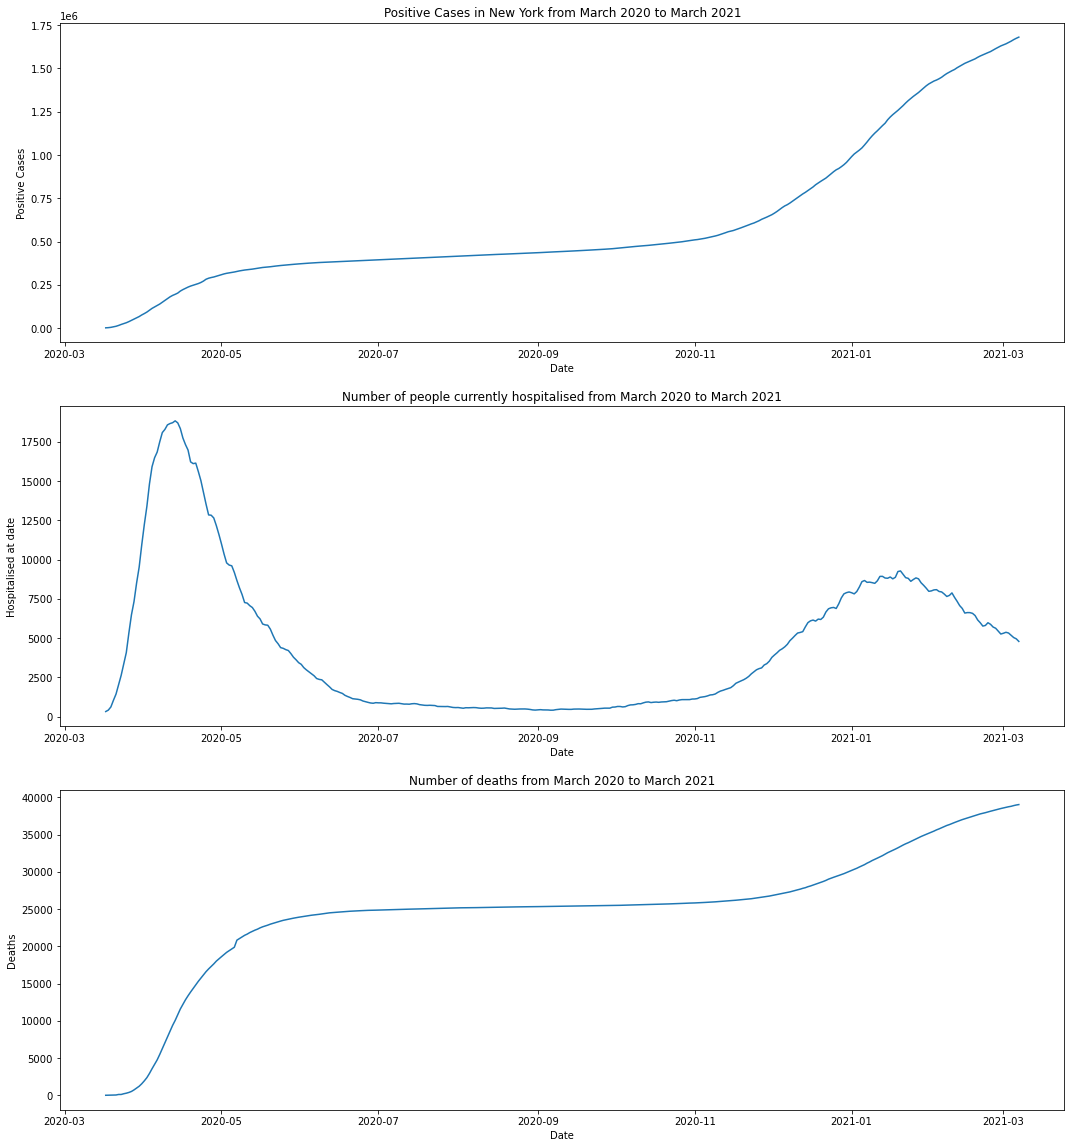

In [26]:
f, axes = plt.subplots(3,1, figsize=(18, 20))


pos_ny = sb.lineplot(data=newyork_case, x="date", y="positive",ax = axes[0])
pos_ny.set_title('Positive Cases in New York from March 2020 to March 2021')
pos_ny.set_xlabel('Date')
pos_ny.set_ylabel('Positive Cases')

pos_ny = sb.lineplot(data=newyork_case, x="date", y="hospitalizedCurrently",ax = axes[1])
pos_ny.set_title('Number of people currently hospitalised from March 2020 to March 2021')
pos_ny.set_xlabel('Date')
pos_ny.set_ylabel('Hospitalised at date')

pos_ny = sb.lineplot(data=newyork_case, x="date", y="death",ax = axes[2])
pos_ny.set_title('Number of deaths from March 2020 to March 2021')
pos_ny.set_xlabel('Date')
pos_ny.set_ylabel('Deaths')


#### Alaska's Positive cases, hospitalised at date & number of deaths

Text(0, 0.5, 'Deaths')

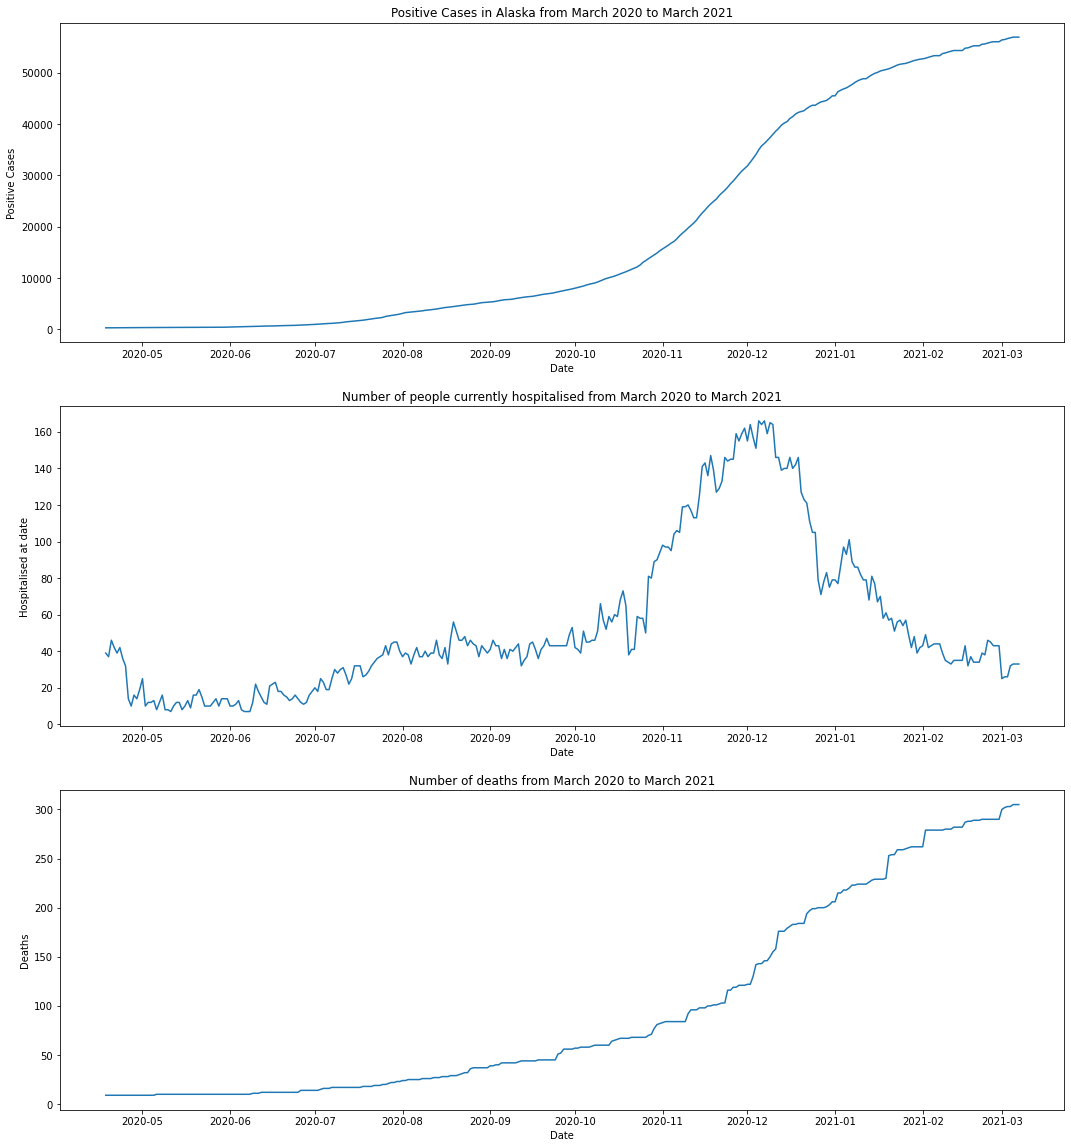

In [27]:
f, axes = plt.subplots(3,1, figsize=(18, 20))


pos_ak = sb.lineplot(data=alaska_case, x="date", y="positive",ax = axes[0])
pos_ak.set_title('Positive Cases in Alaska from March 2020 to March 2021')
pos_ak.set_xlabel('Date')
pos_ak.set_ylabel('Positive Cases')

pos_ak = sb.lineplot(data=alaska_case, x="date", y="hospitalizedCurrently",ax = axes[1])
pos_ak.set_title('Number of people currently hospitalised from March 2020 to March 2021')
pos_ak.set_xlabel('Date')
pos_ak.set_ylabel('Hospitalised at date')

pos_ak = sb.lineplot(data=alaska_case, x="date", y="death",ax = axes[2])
pos_ak.set_title('Number of deaths from March 2020 to March 2021')
pos_ak.set_xlabel('Date')
pos_ak.set_ylabel('Deaths')

#### Texas's Positive cases, hospitalised at date & number of deaths

Text(0, 0.5, 'Deaths')

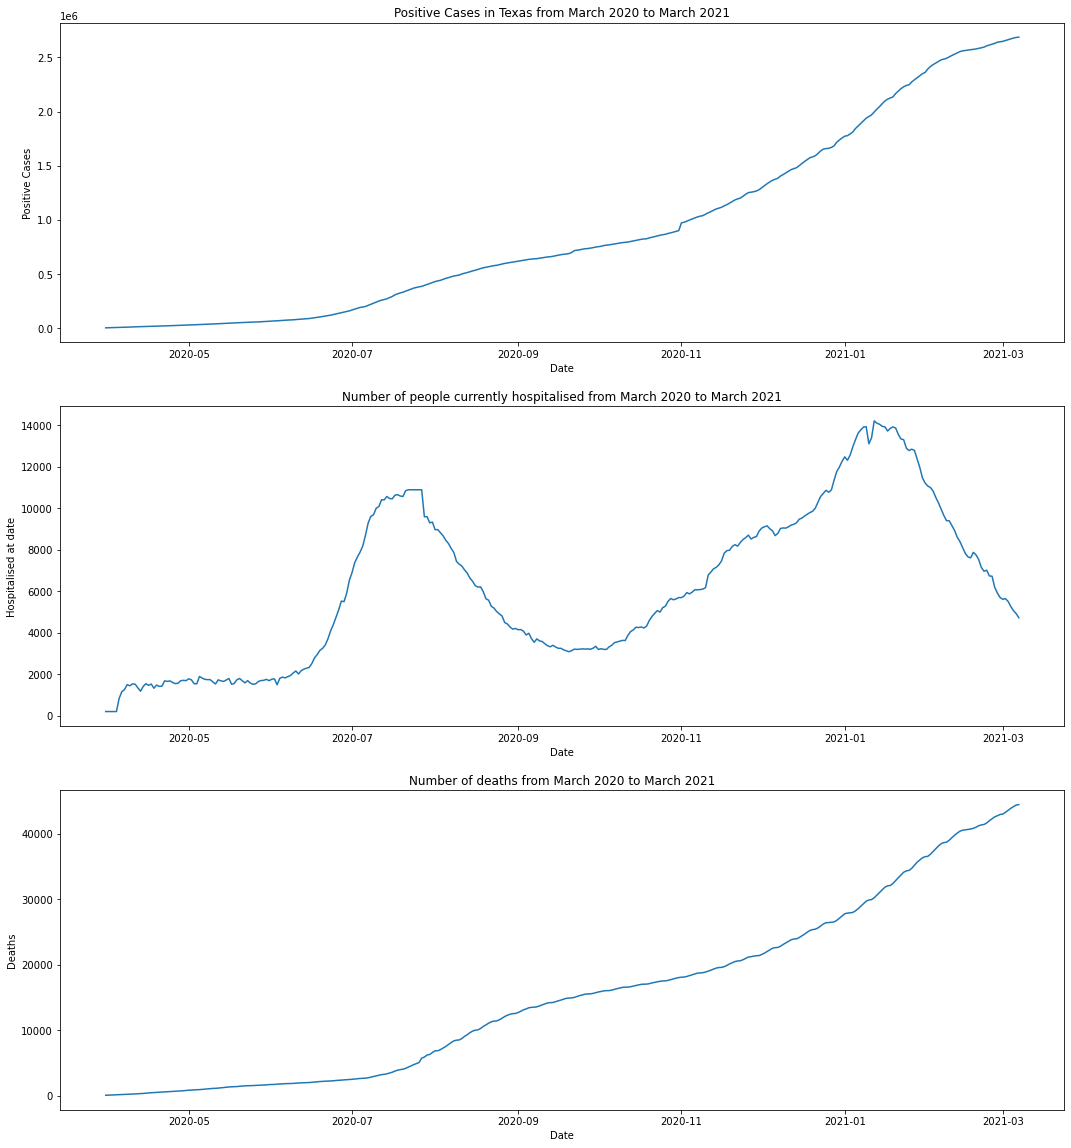

In [28]:
f, axes = plt.subplots(3,1, figsize=(18, 20))


pos_tx = sb.lineplot(data=texas_case, x="date", y="positive",ax = axes[0])
pos_tx.set_title('Positive Cases in Texas from March 2020 to March 2021')
pos_tx.set_xlabel('Date')
pos_tx.set_ylabel('Positive Cases')

pos_tx = sb.lineplot(data=texas_case, x="date", y="hospitalizedCurrently",ax = axes[1])
pos_tx.set_title('Number of people currently hospitalised from March 2020 to March 2021')
pos_tx.set_xlabel('Date')
pos_tx.set_ylabel('Hospitalised at date')

pos_tx = sb.lineplot(data=texas_case, x="date", y="death",ax = axes[2])
pos_tx.set_title('Number of deaths from March 2020 to March 2021')
pos_tx.set_xlabel('Date')
pos_tx.set_ylabel('Deaths')

#### Minnesota's Positive cases, hospitalised at date & number of deaths

Text(0, 0.5, 'Deaths')

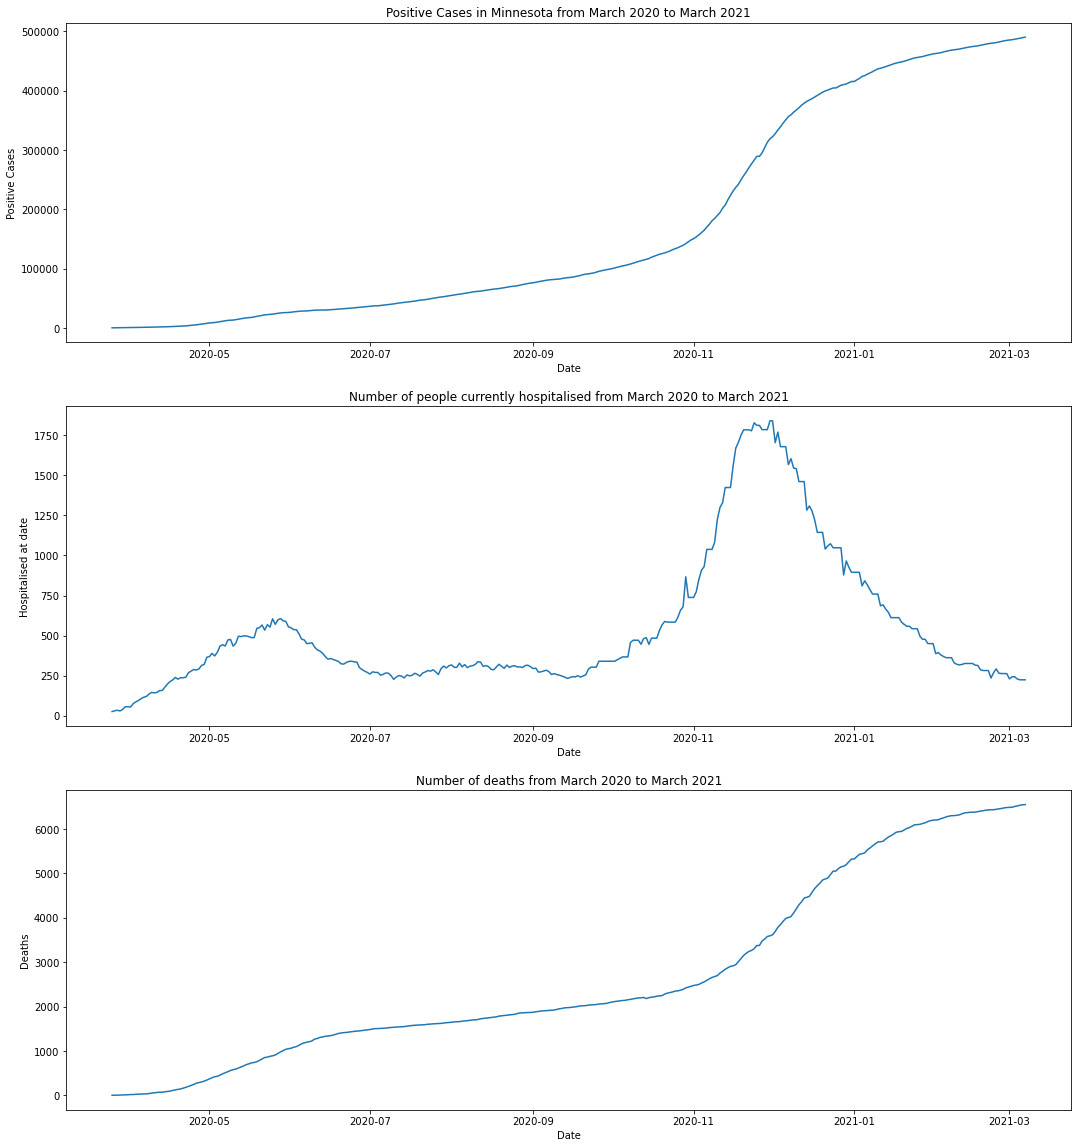

In [29]:
f, axes = plt.subplots(3,1, figsize=(18, 20))


pos_mn = sb.lineplot(data=minnesota_case, x="date", y="positive",ax = axes[0])
pos_mn.set_title('Positive Cases in Minnesota from March 2020 to March 2021')
pos_mn.set_xlabel('Date')
pos_mn.set_ylabel('Positive Cases')

pos_mn = sb.lineplot(data=minnesota_case, x="date", y="hospitalizedCurrently",ax = axes[1])
pos_mn.set_title('Number of people currently hospitalised from March 2020 to March 2021')
pos_mn.set_xlabel('Date')
pos_mn.set_ylabel('Hospitalised at date')

pos_mn = sb.lineplot(data=minnesota_case, x="date", y="death",ax = axes[2])
pos_mn.set_title('Number of deaths from March 2020 to March 2021')
pos_mn.set_xlabel('Date')
pos_mn.set_ylabel('Deaths')

#### Wisconsin's Positive cases, hospitalised at date & number of deaths

Text(0, 0.5, 'Deaths')

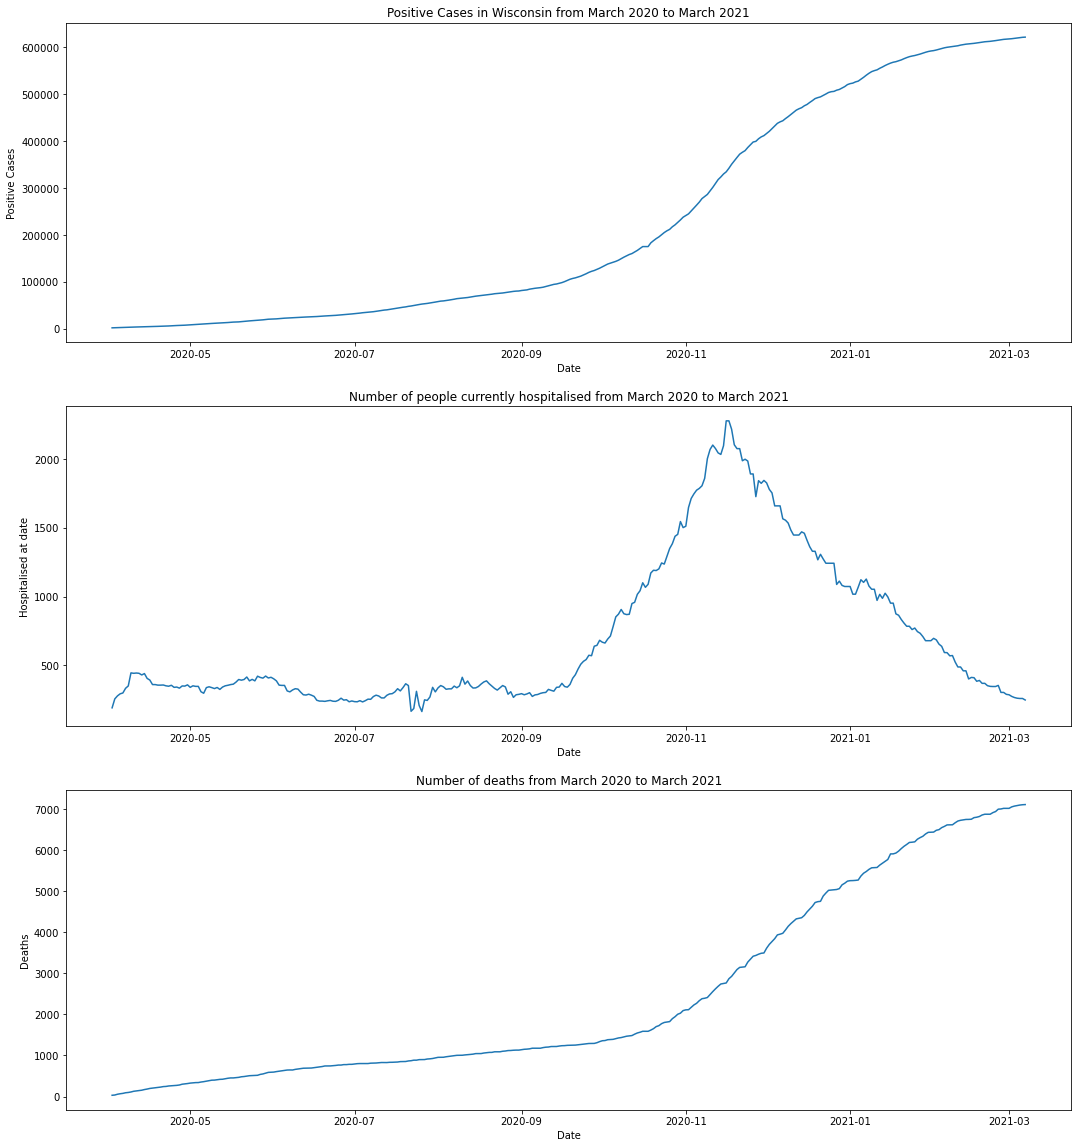

In [30]:
f, axes = plt.subplots(3,1, figsize=(18, 20))


pos_wi = sb.lineplot(data=wisconsin_case, x="date", y="positive",ax = axes[0])
pos_wi.set_title('Positive Cases in Wisconsin from March 2020 to March 2021')
pos_wi.set_xlabel('Date')
pos_wi.set_ylabel('Positive Cases')

pos_wi = sb.lineplot(data=wisconsin_case, x="date", y="hospitalizedCurrently",ax = axes[1])
pos_wi.set_title('Number of people currently hospitalised from March 2020 to March 2021')
pos_wi.set_xlabel('Date')
pos_wi.set_ylabel('Hospitalised at date')

pos_wi = sb.lineplot(data=wisconsin_case, x="date", y="death",ax = axes[2])
pos_wi.set_title('Number of deaths from March 2020 to March 2021')
pos_wi.set_xlabel('Date')
pos_wi.set_ylabel('Deaths')

## Statistical analysis of Popgotcovid Dataset
    1) Adding Black Cases and White Cases gave a mid-total
    2) Plotted 
            - Total COVID cases in Red
            - Stacked the total Black and White COVID cases (calculated in 1) ) in Blue
            - Stacked Black COVID cases in orange 
    3) Result was a stacked bar graph as labelled by the legend, generated for all US states

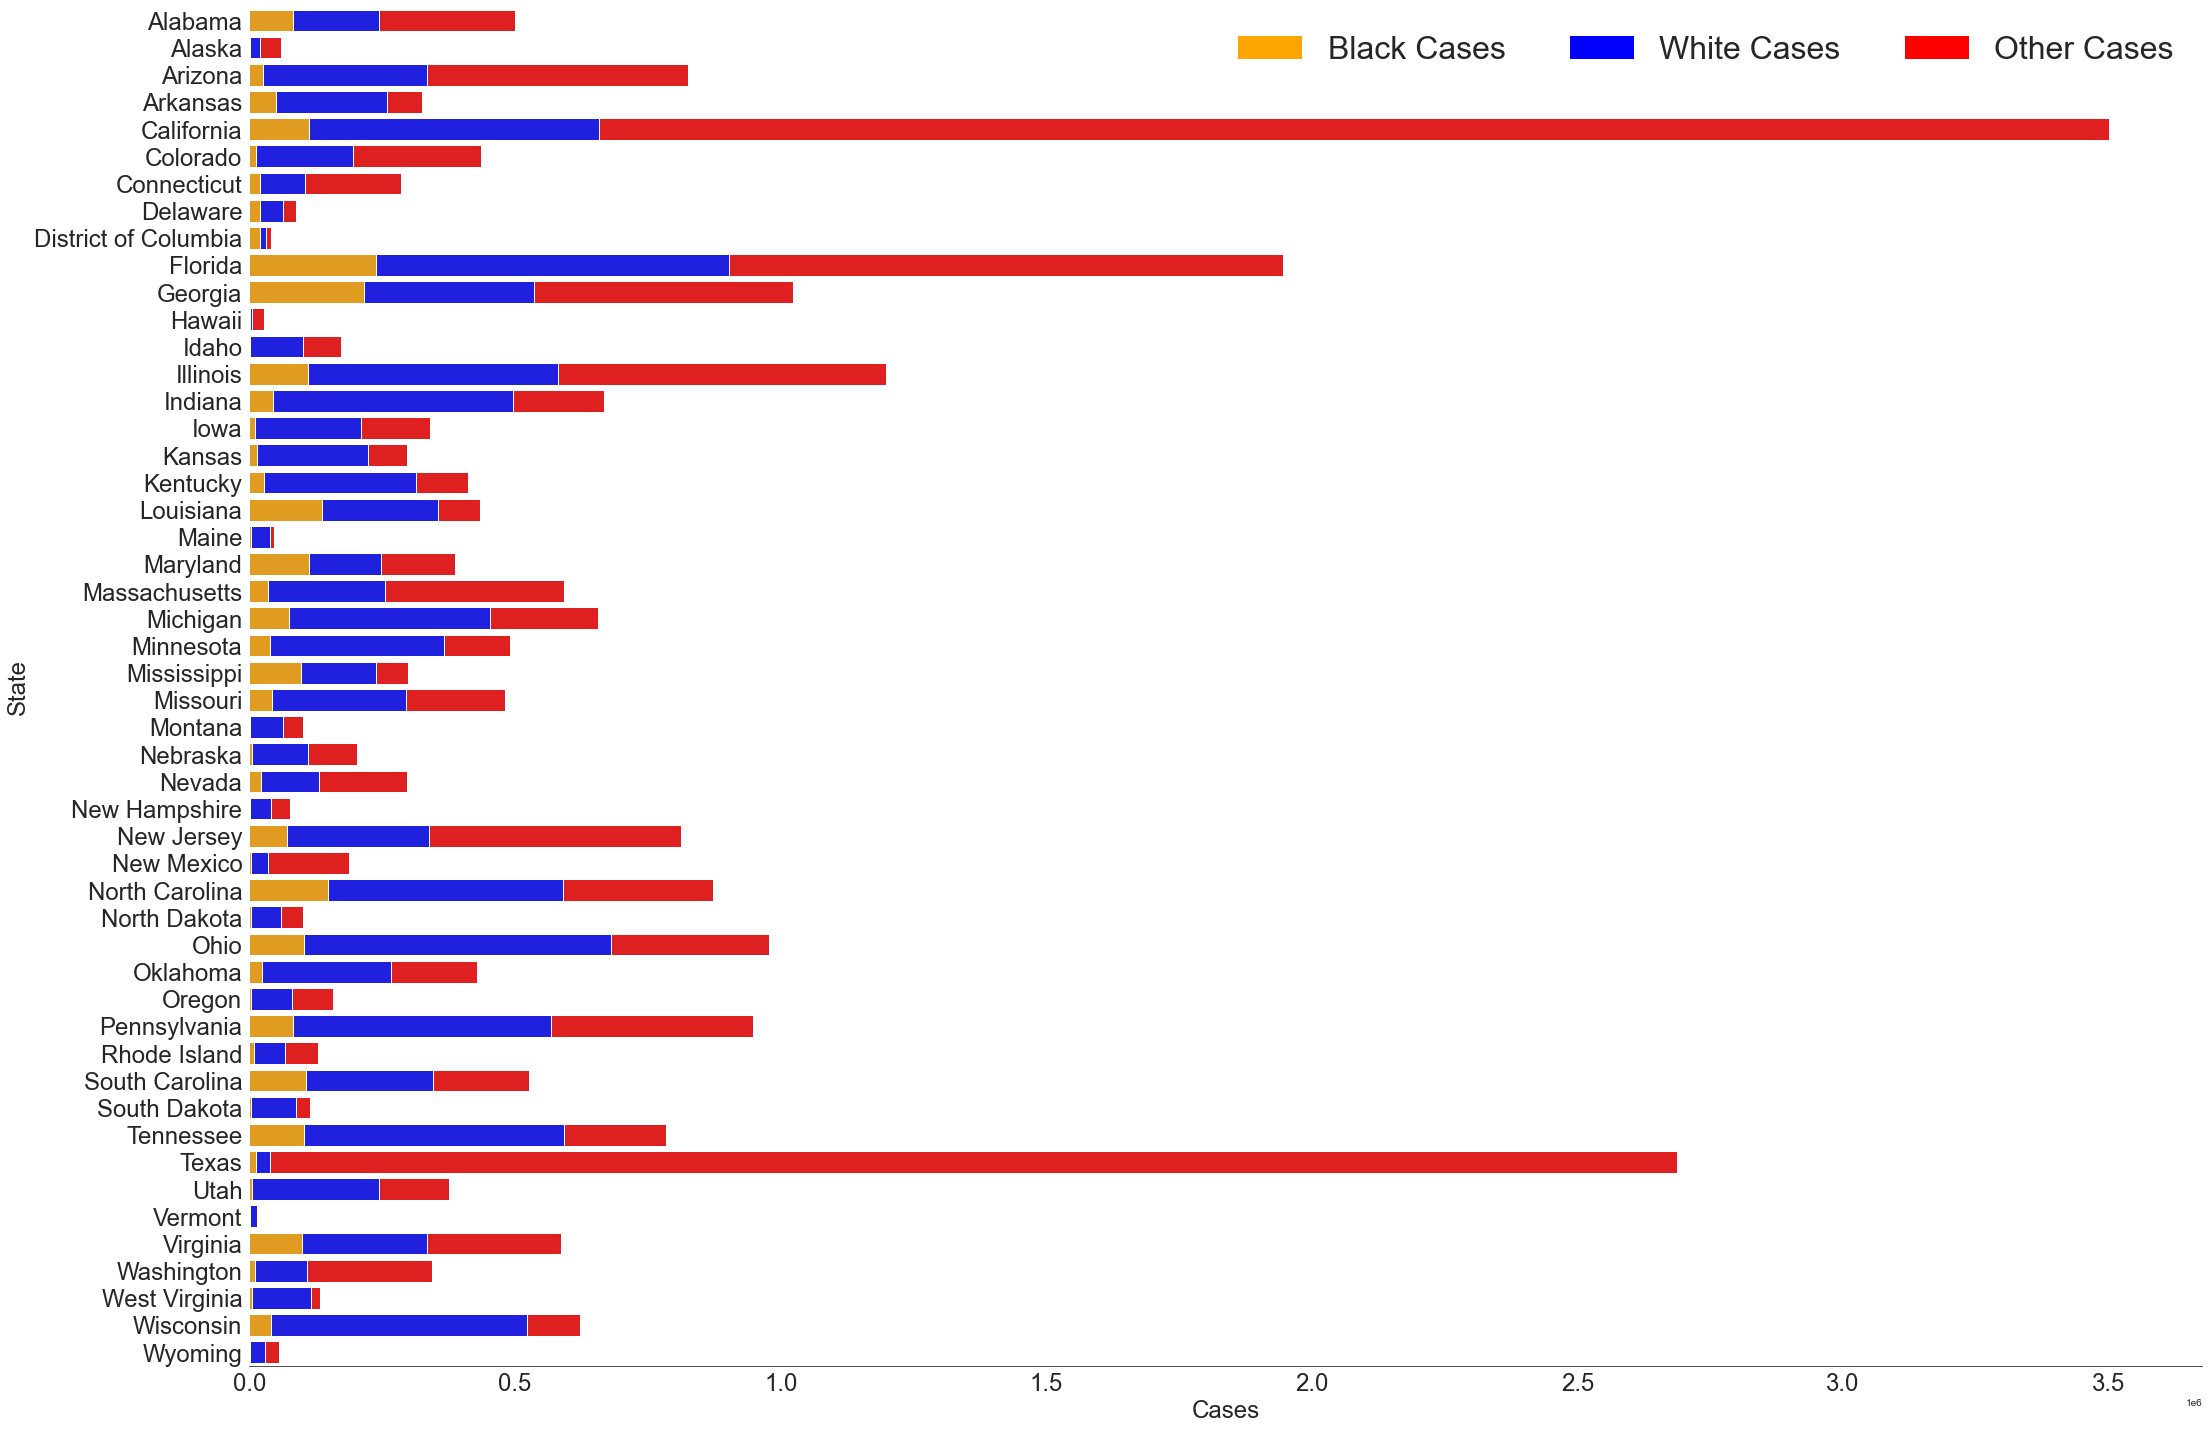

In [31]:
popgotcovid["Black_White"] = popgotcovid.Cases_White + popgotcovid.Cases_Black

#Set general plot properties
sb.set_style("white")
sb.set_context({"figure.figsize": (35, 25)})

#Plot 1 - background - "total" (top) series
sb.barplot(y = popgotcovid.State, x = popgotcovid.Cases_Total, orient = 'h', color = "red")

#Plot 2 - overlay - "top" popgotcovid
middle_plot = sb.barplot(y = popgotcovid.State, x = popgotcovid.Black_White, orient = 'h', color = "blue")

#Plot 3 - overlay - "bottom" popgotcovid
bottom_plot = sb.barplot(y = popgotcovid.State, x = popgotcovid.Cases_Black, orient = 'h', color = "orange")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='orange',  edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['Black Cases','White Cases', 'Other Cases'], loc=1, ncol = 3, prop={'size':32})
l.draw_frame(False)

sb.despine(left=True)
bottom_plot.set_xlabel("Cases")
bottom_plot.set_ylabel("State")

for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(24)

# Multi-variate Statistical Analysis

## Regression Analysis of Daily Covid Dataset

### Why regression?
Predict continuous output variable based on predictor variables <br>
- Predict Death Rate based on Hospital Occupancy
- Find correlation between Hospital Occupancy and COVID-19 infection and fatality rate <br>

### Finding the correlation between Hospital Occupancy & Death Rate
1. Seaborn Joint Plot of death_rate over proportion_hospitalised<br>
2. Linear regression of COVID-19 Death Rate (Train Data) over Proportion of COVID-19 Patients Hospitalised (Train Data)<br>
3. Linear regression between Predicted values of the Death Rate (Train Data) over True values of Death Rate (Train Data) 
4. Linear regression between Predicted values of the Death Rate (Test Data) over True values of Death Rate (Test data)<br>


In [32]:
#Add 2 columns: Proportion_hospitalised & Death_rate, as it will be needed in the data analysis section
#Proportion_hospitalised: number of patients currently hospitalised/number of positive cases
#Death_rate: number of deaths/number of positive cases


current_proportion_hospitalised = []
death_rate = []

for x in range(0,17334):
    current_proportion_hospitalised.append(coviddata.hospitalizedCurrently[x]/coviddata.positive[x] * 100)
    death_rate.append(coviddata.death[x]/coviddata.positive[x] * 100)
    
coviddata = coviddata.assign(Proportion_hospitalised=current_proportion_hospitalised, Death_rate = death_rate)

coviddata

,date,state,positive,hospitalizedCurrently,death,Proportion_hospitalised,Death_rate
0,20210307,AK,56886.0,33.0,305.0,0.058011,0.536160
1,20210307,AL,499819.0,494.0,10148.0,0.098836,2.030335
2,20210307,AR,324818.0,335.0,5319.0,0.103135,1.637532
3,20210307,AZ,826454.0,963.0,16328.0,0.116522,1.975670
4,20210307,CA,3501394.0,4291.0,54124.0,0.122551,1.545784
...,...,...,...,...,...,...,...
17329,20200321,NY,10356.0,1436.0,44.0,13.866358,0.424874
17330,20200320,NY,7102.0,1042.0,35.0,14.671923,0.492819
17331,20200319,NY,4152.0,617.0,12.0,14.860308,0.289017
17332,20200318,NY,2383.0,416.0,12.0,17.456987,0.503567


### Overall 

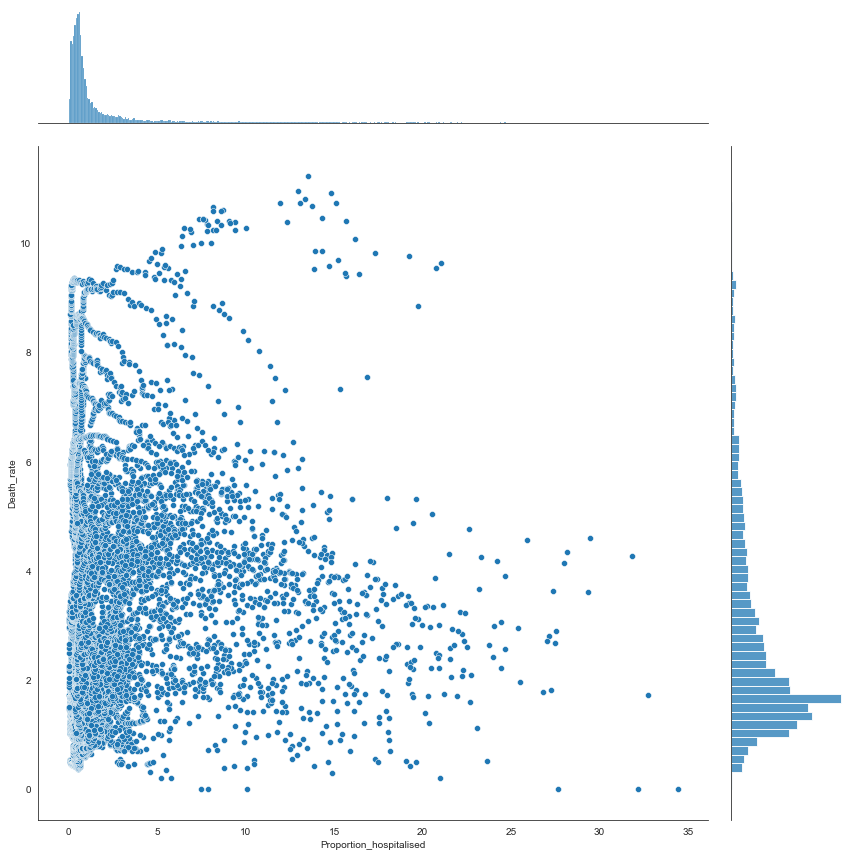

In [33]:
# Recall the Dataset
death_rate = pd.DataFrame(coviddata['Death_rate'])   # Response, y-axis
proportion_hospitalised = pd.DataFrame(coviddata['Proportion_hospitalised'])         # Predictor, x-axis

# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([proportion_hospitalised, death_rate], axis = 1).reindex(proportion_hospitalised.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Proportion_hospitalised", y = "Death_rate", height = 12)

In [34]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,Proportion_hospitalised,Death_rate
Proportion_hospitalised,1.000000,0.206248
Death_rate,0.206248,1.000000


Intercept of Regression 	: b =  [2.52803013]
Coefficients of Regression 	: a =  [[0.12634253]]



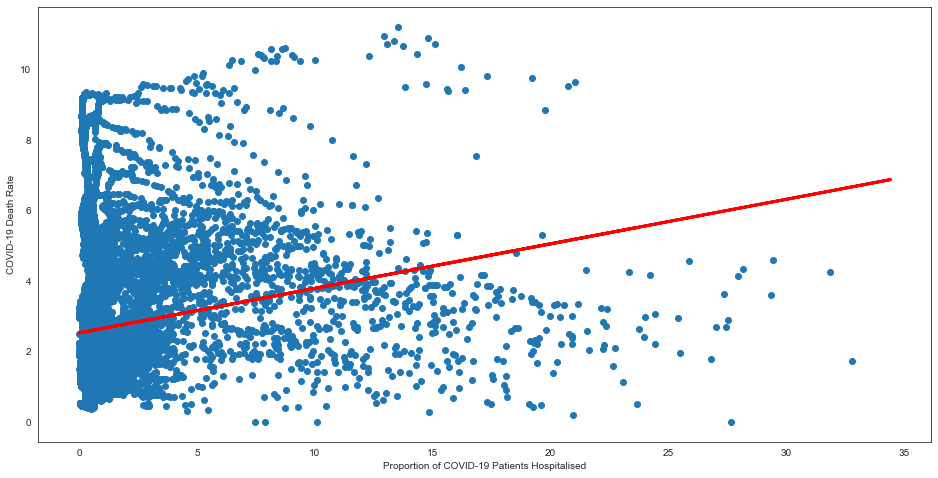

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.040229962350292525
Mean Squared Error (MSE) 	: 3.380623025421052

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.049682631234556185
Mean Squared Error (MSE) 	: 3.150102645615706



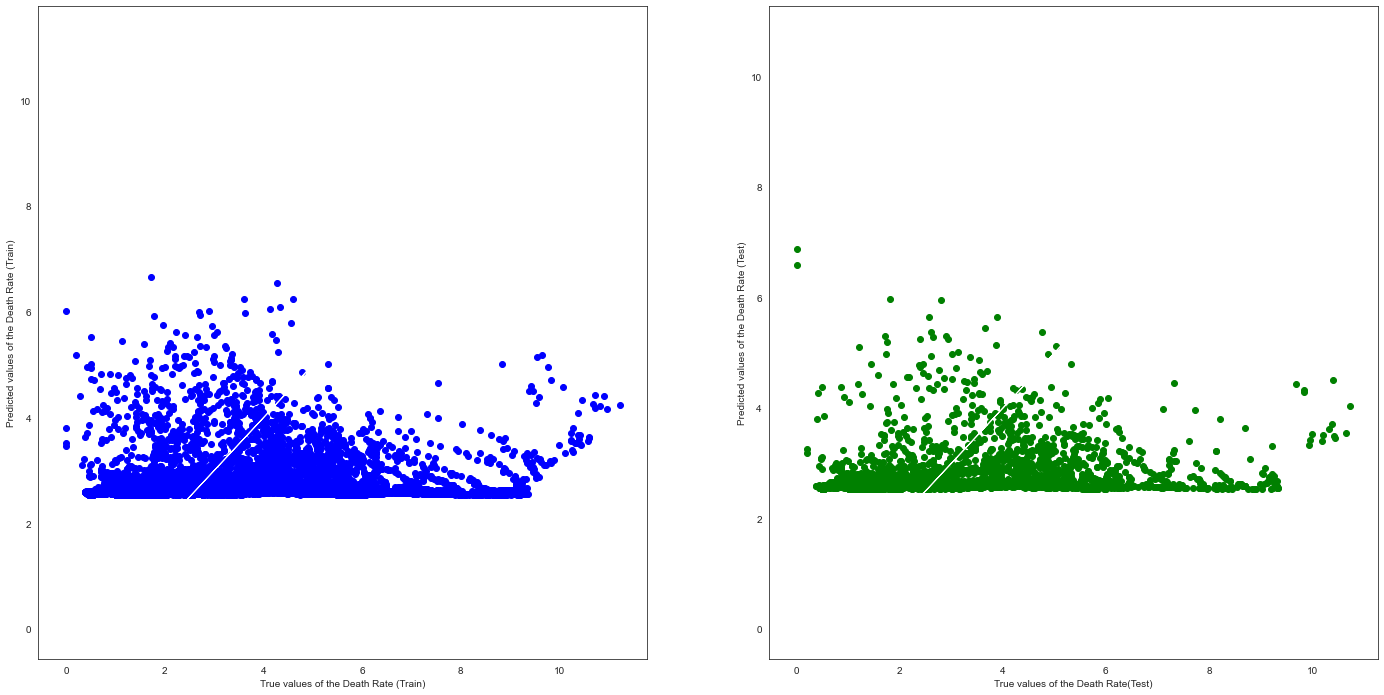

In [35]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(proportion_hospitalised, death_rate, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_x = proportion_hospitalised
regline_y = linreg.intercept_ + linreg.coef_ * proportion_hospitalised

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)

plt.xlabel("Proportion of COVID-19 Patients Hospitalised")
plt.ylabel("COVID-19 Death Rate")
plt.show()

# Predict death_rate values corresponding to Proportion Hospitalised
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Death Rate (Train)")
axes[0].set_ylabel("Predicted values of the Death Rate (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Death Rate(Test)")
axes[1].set_ylabel("Predicted values of the Death Rate (Test)")
plt.show()

### Evaluation of overall hospital occupancy over death rate
- Low Correlation Coefficient of 0.206 <br>
- Very Low Explained Variance of 0.042 and 0.044<br>
#### Why?
- Both proportion hospitalised and death rate has a small % base out of 100<br>
- Different US States have different relationships<br><br>

Hence, to mitigate this issue, we have broken down our analysis into the 5 states as shown below. 

Intercept of Regression 	: b =  [5.27432211]
Coefficients of Regression 	: a =  [[-0.00013246]]



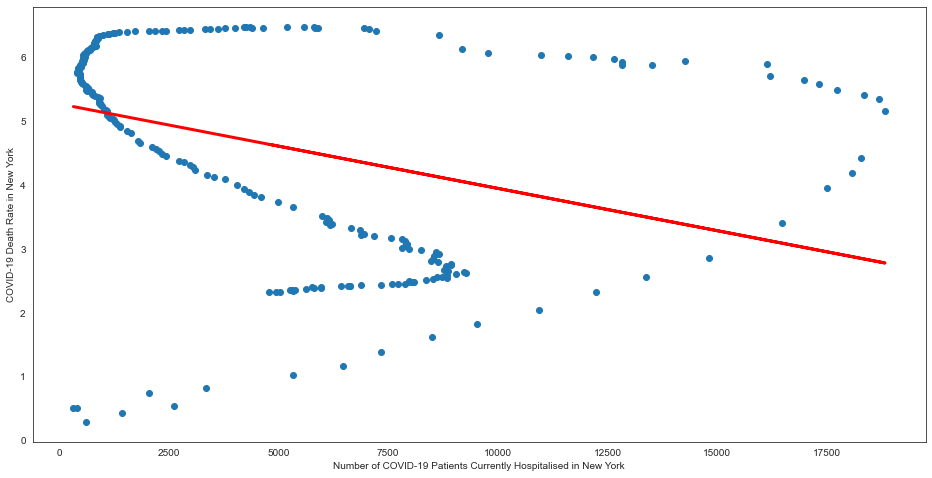

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13219212870322294
Mean Squared Error (MSE) 	: 2.348551499826471

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05107331064617582
Mean Squared Error (MSE) 	: 2.3113697129981885



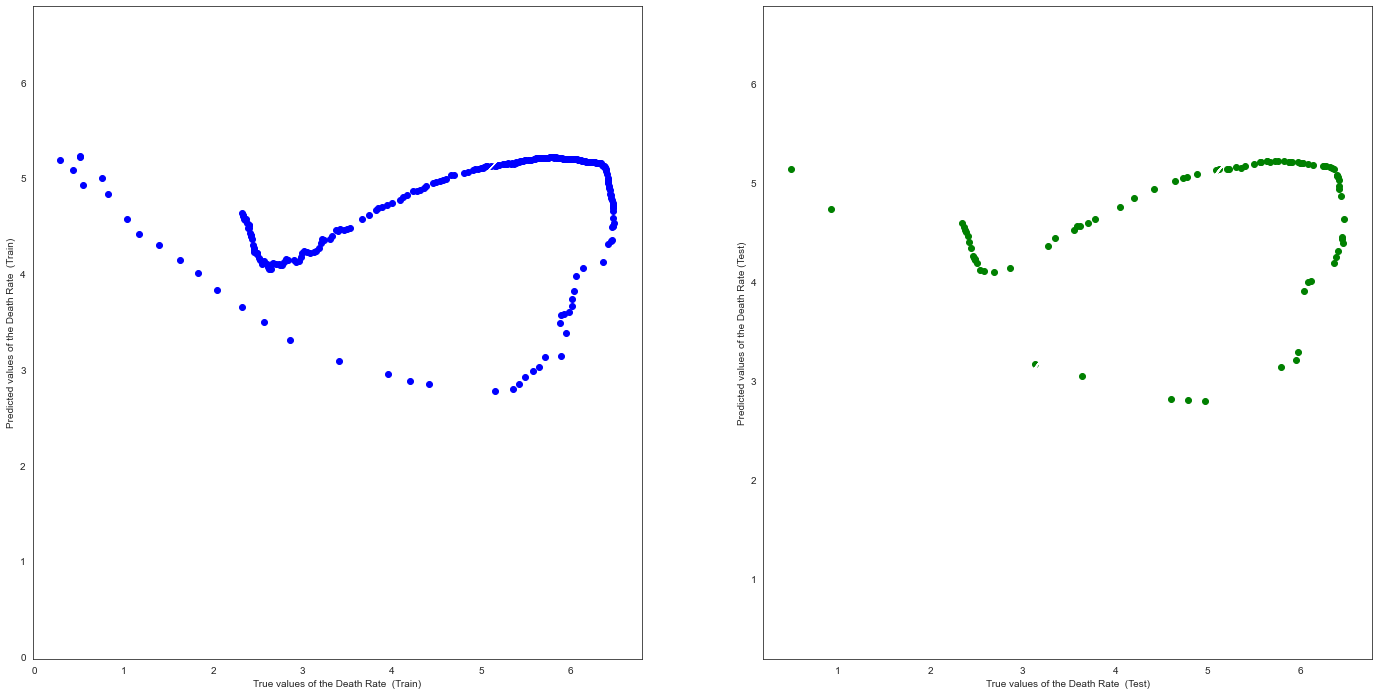

In [36]:
#NEW YORK
# Recall the Dataset
newyork_case = newyork_case.dropna(how='any',axis=0)
death_rate_ny = pd.DataFrame(newyork_case['Death_rate'])   # Response, y-axis
hospitalizedCurrently_ny = pd.DataFrame(newyork_case['hospitalizedCurrently'])         # Predictor, x-axis


# Split the Dataset into Train and Test
X_ny_train, X_ny_test, y_ny_train, y_ny_test = train_test_split(hospitalizedCurrently_ny, death_rate_ny, test_size = 0.25)

# Linear Regression using Train Data
linreg_ny = LinearRegression()         # create the linear regression object
linreg_ny.fit(X_ny_train, y_ny_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_ny.intercept_)
print('Coefficients of Regression \t: a = ', linreg_ny.coef_)
print()

# Formula for the Regression line
regline_ny_x = hospitalizedCurrently_ny
regline_ny_y = linreg_ny.intercept_ + linreg_ny.coef_ * hospitalizedCurrently_ny

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_ny_train, y_ny_train)
plt.plot(regline_ny_x, regline_ny_y, 'r-', linewidth = 3)

plt.xlabel("Number of COVID-19 Patients Currently Hospitalised in New York")
plt.ylabel("COVID-19 Death Rate in New York")
plt.show()

# Predict death_rate values corresponding to Proportion Hospitalised
y_ny_train_pred = linreg_ny.predict(X_ny_train)
y_ny_test_pred = linreg_ny.predict(X_ny_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_ny.score(X_ny_train, y_ny_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_ny_train, y_ny_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_ny.score(X_ny_test, y_ny_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_ny_test, y_ny_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_ny_train, y_ny_train_pred, color = "blue")
axes[0].plot(y_ny_train, y_ny_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Death Rate  (Train)")
axes[0].set_ylabel("Predicted values of the Death Rate  (Train)")
axes[1].scatter(y_ny_test, y_ny_test_pred, color = "green")
axes[1].plot(y_ny_test, y_ny_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Death Rate  (Test)")
axes[1].set_ylabel("Predicted values of the Death Rate (Test)")
plt.show()

In [37]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hospitalizedCurrently_ny, death_rate_ny], axis = 1).reindex(hospitalizedCurrently_ny.index)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,hospitalizedCurrently,Death_rate
hospitalizedCurrently,1.000000,-0.341752
Death_rate,-0.341752,1.000000


Intercept of Regression 	: b =  [1.55710497]
Coefficients of Regression 	: a =  [[-0.01042237]]



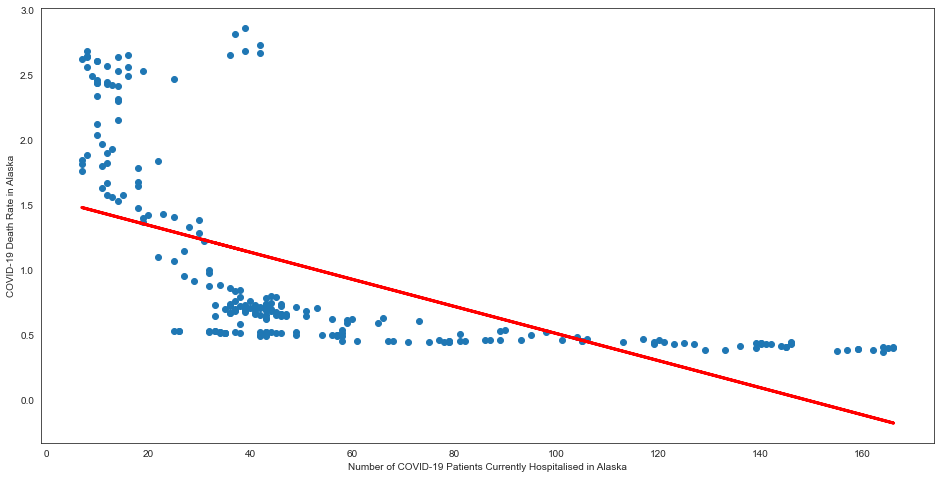

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3600284839302268
Mean Squared Error (MSE) 	: 0.3398388752971164

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3521280171811596
Mean Squared Error (MSE) 	: 0.34231245313288194



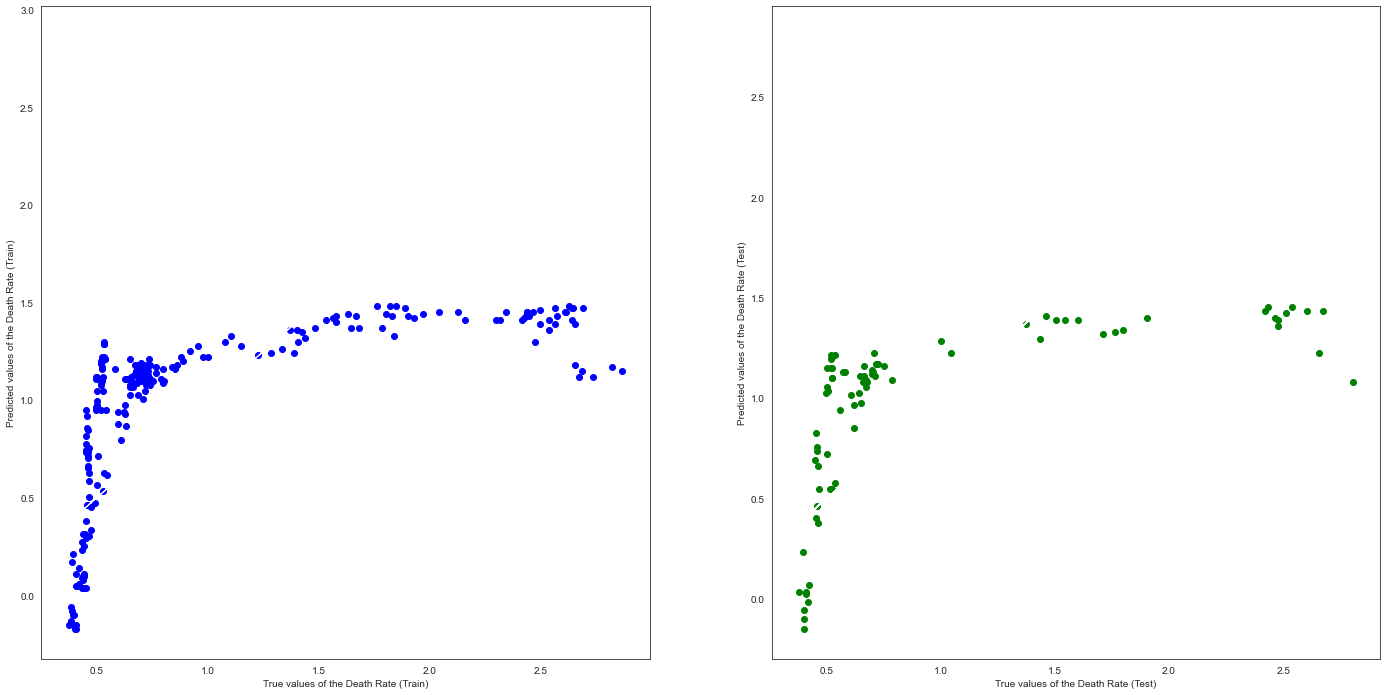

In [38]:
#ALASKA
# Recall the Dataset
alaska_case = alaska_case.dropna(how='any',axis=0)
death_rate_ak = pd.DataFrame(alaska_case['Death_rate'])   # Response, y-axis
hospitalizedCurrently_ak = pd.DataFrame(alaska_case['hospitalizedCurrently'])         # Predictor, x-axis

# Split the Dataset into Train and Test
X_ak_train, X_ak_test, y_ak_train, y_ak_test = train_test_split(hospitalizedCurrently_ak, death_rate_ak, test_size = 0.25)

# Linear Regression using Train Data
linreg_ak = LinearRegression()         # create the linear regression object
linreg_ak.fit(X_ak_train, y_ak_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_ak.intercept_)
print('Coefficients of Regression \t: a = ', linreg_ak.coef_)
print()

# Formula for the Regression line
regline_ak_x = hospitalizedCurrently_ak
regline_ak_y = linreg_ak.intercept_ + linreg_ak.coef_ * hospitalizedCurrently_ak

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_ak_train, y_ak_train)
plt.plot(regline_ak_x, regline_ak_y, 'r-', linewidth = 3)

plt.xlabel("Number of COVID-19 Patients Currently Hospitalised in Alaska")
plt.ylabel("COVID-19 Death Rate in Alaska")
plt.show()


# Predict death_rate values corresponding to Proportion Hospitalised
y_ak_train_pred = linreg_ak.predict(X_ak_train)
y_ak_test_pred = linreg_ak.predict(X_ak_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_ak.score(X_ak_train, y_ak_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_ak_train, y_ak_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_ak.score(X_ak_test, y_ak_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_ak_test, y_ak_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_ak_train, y_ak_train_pred, color = "blue")
axes[0].plot(y_ak_train, y_ak_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Death Rate (Train)")
axes[0].set_ylabel("Predicted values of the Death Rate (Train)")
axes[1].scatter(y_ak_test, y_ak_test_pred, color = "green")
axes[1].plot(y_ak_test, y_ak_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Death Rate (Test)")
axes[1].set_ylabel("Predicted values of the Death Rate (Test)")
plt.show()

In [39]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hospitalizedCurrently_ak, death_rate_ak], axis = 1).reindex(hospitalizedCurrently_ak.index)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,hospitalizedCurrently,Death_rate
hospitalizedCurrently,1.000000,-0.598486
Death_rate,-0.598486,1.000000


Intercept of Regression 	: b =  [3.10444542]
Coefficients of Regression 	: a =  [[-0.00122678]]



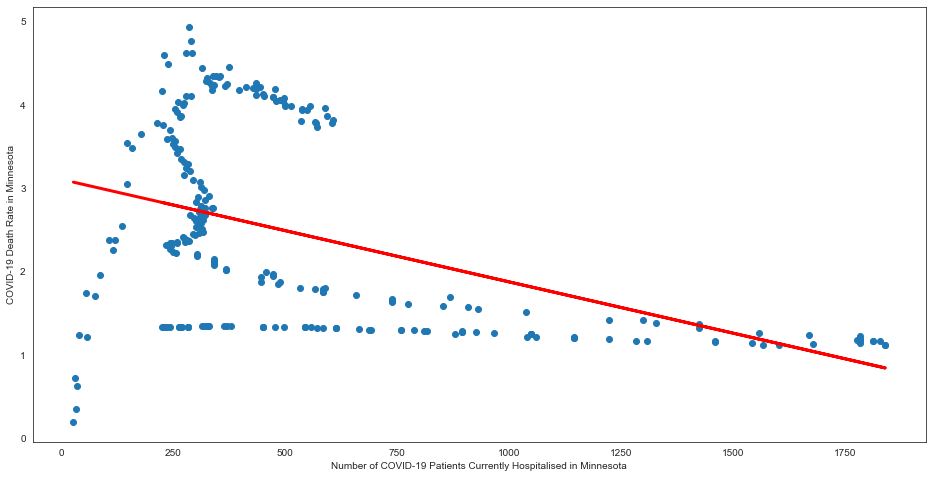

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.20067848890947781
Mean Squared Error (MSE) 	: 1.0905533088837507

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2288088545528798
Mean Squared Error (MSE) 	: 1.158992997791884



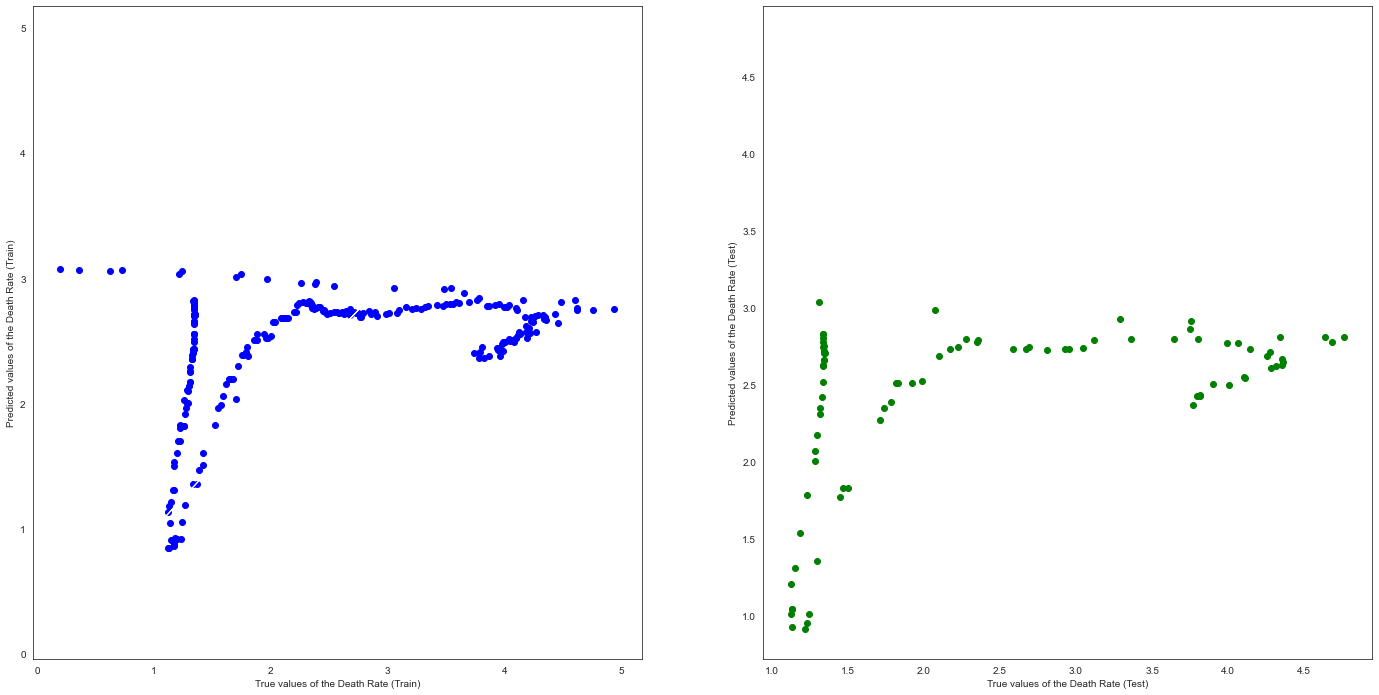

In [40]:
#MINNESOTA
# Recall the Dataset
minnesota_case = minnesota_case.dropna(how='any',axis=0)
death_rate_mn = pd.DataFrame(minnesota_case['Death_rate'])   # Response, y-axis
hospitalizedCurrently_mn = pd.DataFrame(minnesota_case['hospitalizedCurrently'])         # Predictor, x-axis

# Split the Dataset into Train and Test
X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(hospitalizedCurrently_mn, death_rate_mn, test_size = 0.25)

# Linear Regression using Train Data
linreg_mn = LinearRegression()         # create the linear regression object
linreg_mn.fit(X_mn_train, y_mn_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_mn.intercept_)
print('Coefficients of Regression \t: a = ', linreg_mn.coef_)
print()

# Formula for the Regression line
regline_mn_x = hospitalizedCurrently_mn
regline_mn_y = linreg_mn.intercept_ + linreg_mn.coef_ * hospitalizedCurrently_mn

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_mn_train, y_mn_train)
plt.plot(regline_mn_x, regline_mn_y, 'r-', linewidth = 3)

plt.xlabel("Number of COVID-19 Patients Currently Hospitalised in Minnesota")
plt.ylabel("COVID-19 Death Rate in Minnesota")
plt.show()


# Predict death_rate values corresponding to Proportion Hospitalised
y_mn_train_pred = linreg_mn.predict(X_mn_train)
y_mn_test_pred = linreg_mn.predict(X_mn_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_mn.score(X_mn_train, y_mn_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_mn_train, y_mn_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_mn.score(X_mn_test, y_mn_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_mn_test, y_mn_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_mn_train, y_mn_train_pred, color = "blue")
axes[0].plot(y_mn_train, y_mn_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Death Rate (Train)")
axes[0].set_ylabel("Predicted values of the Death Rate (Train)")
axes[1].scatter(y_mn_test, y_mn_test_pred, color = "green")
axes[1].plot(y_mn_test, y_mn_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Death Rate (Test)")
axes[1].set_ylabel("Predicted values of the Death Rate (Test)")
plt.show()

In [41]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hospitalizedCurrently_mn, death_rate_mn], axis = 1).reindex(hospitalizedCurrently_mn.index)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,hospitalizedCurrently,Death_rate
hospitalizedCurrently,1.000000,-0.456472
Death_rate,-0.456472,1.000000


In [42]:
texas_case

,positive,hospitalizedCurrently,death,Proportion_hospitalised,Death_rate
date,,,,,
2020-03-31,3266.0,196.0,41.0,6.001225,1.255358
2020-04-01,3996.0,196.0,58.0,4.904905,1.451451
2020-04-02,4665.0,196.0,70.0,4.201501,1.500536
2020-04-03,5324.0,196.0,90.0,3.681443,1.690458
2020-04-04,6112.0,196.0,105.0,3.206806,1.717932
...,...,...,...,...,...
2021-03-03,2663414.0,5508.0,43563.0,0.206802,1.635608
2021-03-04,2671442.0,5263.0,43878.0,0.197010,1.642484
2021-03-05,2678295.0,5065.0,44134.0,0.189113,1.647839


Intercept of Regression 	: b =  [2.47258887]
Coefficients of Regression 	: a =  [[-9.27697317e-05]]



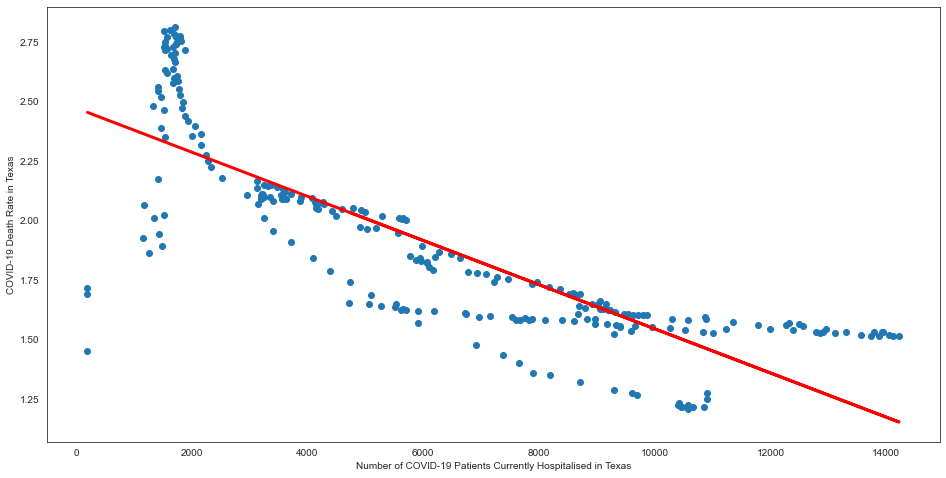

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6760174148596925
Mean Squared Error (MSE) 	: 0.0572094301381469

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5671206087211356
Mean Squared Error (MSE) 	: 0.07371580795909861



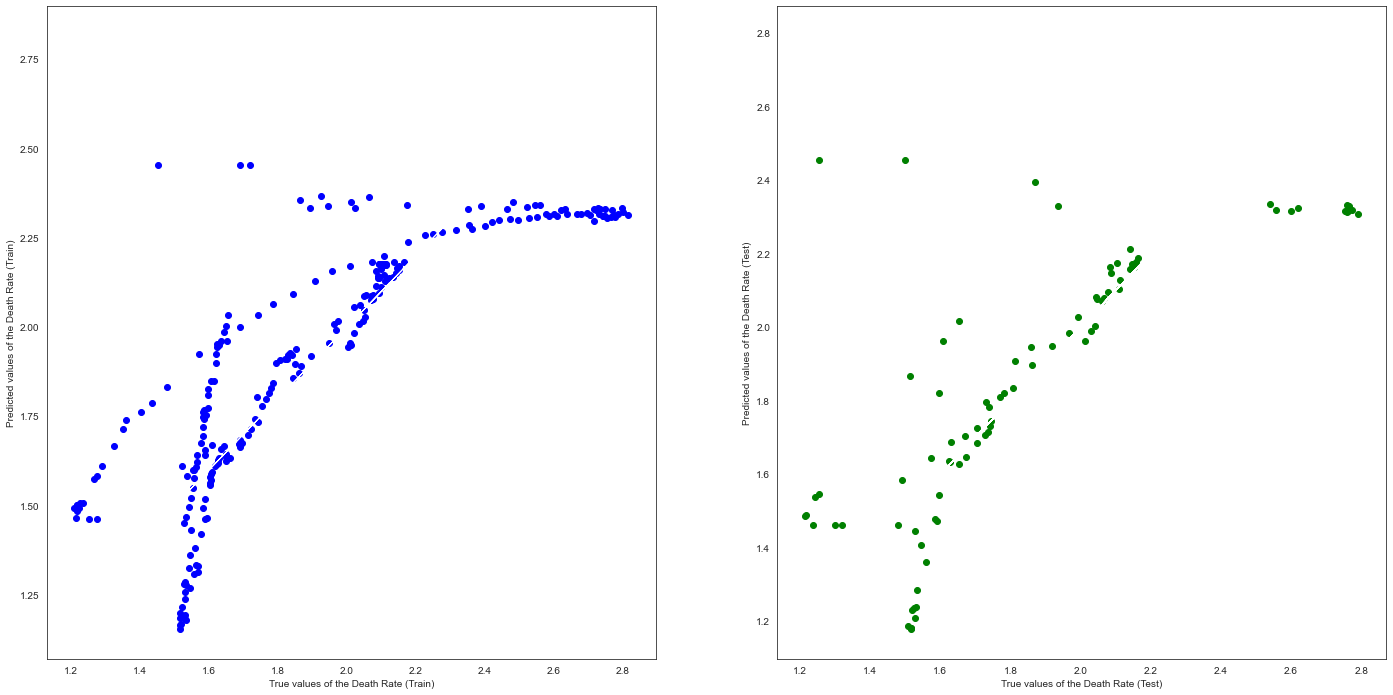

In [43]:
#TEXAS
# Recall the Dataset
texas_case = texas_case.dropna(how='any',axis=0)
death_rate_tx = pd.DataFrame(texas_case['Death_rate'])   # Response, y-axis
hospitalizedCurrently_tx = pd.DataFrame(texas_case['hospitalizedCurrently'])         # Predictor, x-axis

# Split the Dataset into Train and Test
X_tx_train, X_tx_test, y_tx_train, y_tx_test = train_test_split(hospitalizedCurrently_tx, death_rate_tx, test_size = 0.25)

# Linear Regression using Train Data
linreg_tx = LinearRegression()         # create the linear regression object
linreg_tx.fit(X_tx_train, y_tx_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_tx.intercept_)
print('Coefficients of Regression \t: a = ', linreg_tx.coef_)
print()

# Formula for the Regression line
regline_tx_x = hospitalizedCurrently_tx
regline_tx_y = linreg_tx.intercept_ + linreg_tx.coef_ * hospitalizedCurrently_tx

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_tx_train, y_tx_train)
plt.plot(regline_tx_x, regline_tx_y, 'r-', linewidth = 3)

plt.xlabel("Number of COVID-19 Patients Currently Hospitalised in Texas")
plt.ylabel("COVID-19 Death Rate in Texas")
plt.show()


# Predict death_rate values corresponding to Proportion Hospitalised
y_tx_train_pred = linreg_tx.predict(X_tx_train)
y_tx_test_pred = linreg_tx.predict(X_tx_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_tx.score(X_tx_train, y_tx_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_tx_train, y_tx_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_tx.score(X_tx_test, y_tx_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_tx_test, y_tx_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_tx_train, y_tx_train_pred, color = "blue")
axes[0].plot(y_tx_train, y_tx_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Death Rate (Train)")
axes[0].set_ylabel("Predicted values of the Death Rate (Train)")
axes[1].scatter(y_tx_test, y_tx_test_pred, color = "green")
axes[1].plot(y_tx_test, y_tx_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Death Rate (Test)")
axes[1].set_ylabel("Predicted values of the Death Rate (Test)")
plt.show()

In [44]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hospitalizedCurrently_tx, death_rate_tx], axis = 1).reindex(hospitalizedCurrently_tx.index)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,hospitalizedCurrently,Death_rate
hospitalizedCurrently,1.000000,-0.807236
Death_rate,-0.807236,1.000000


Intercept of Regression 	: b =  [2.50775392]
Coefficients of Regression 	: a =  [[-0.00106968]]



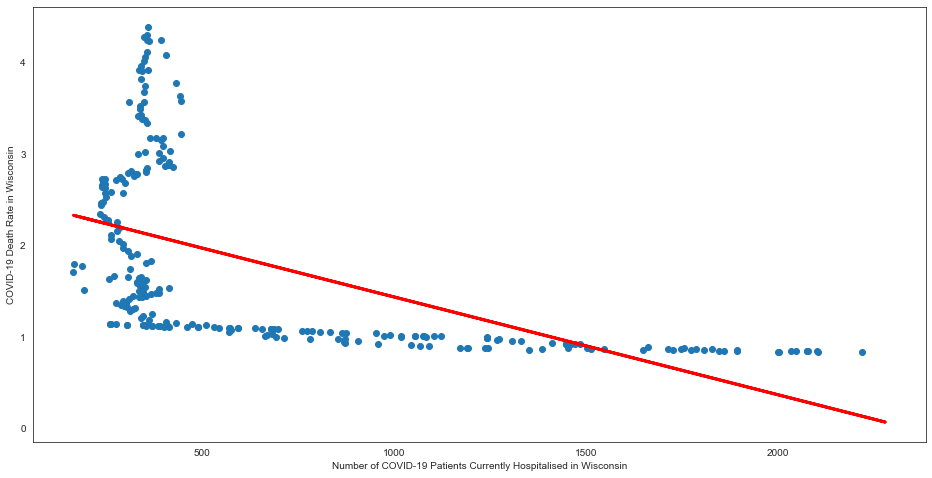

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.31289635332944443
Mean Squared Error (MSE) 	: 0.694726135317411

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2621760641157813
Mean Squared Error (MSE) 	: 0.5896380356148488



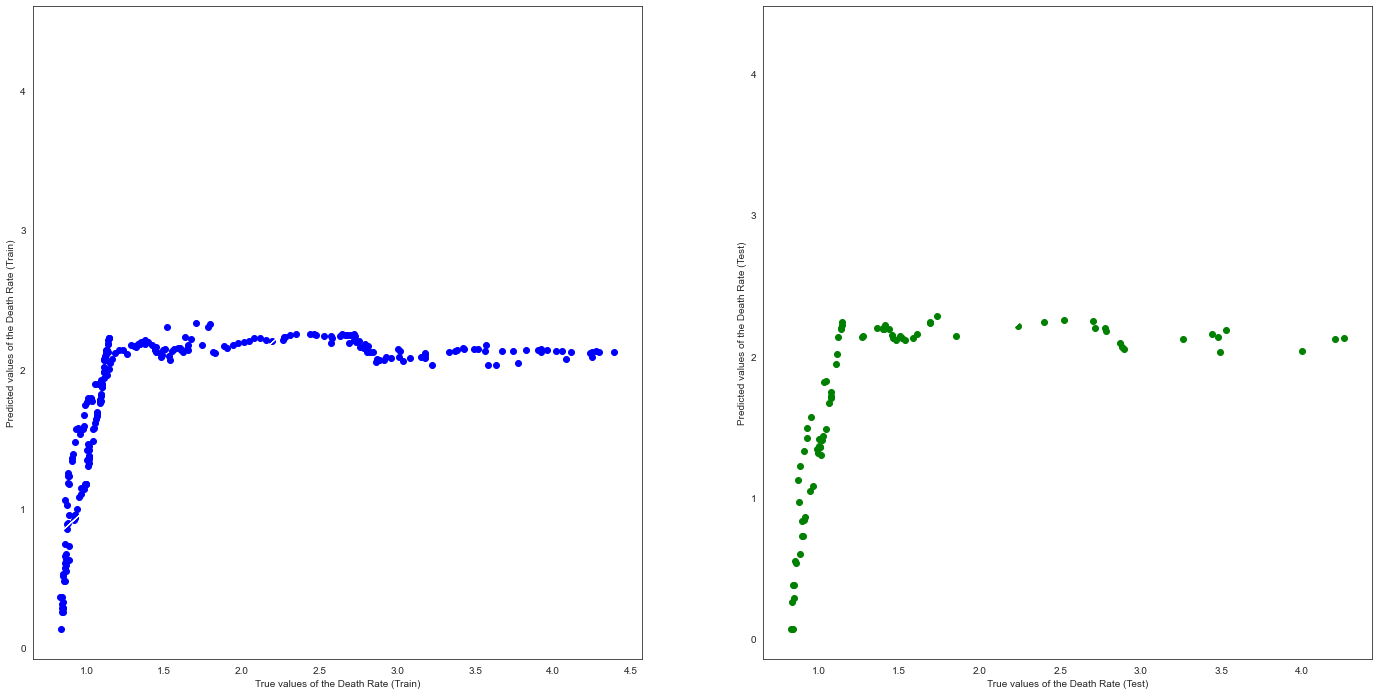

In [45]:
#WISCONSIN
# Recall the Dataset
wisconsin_case = wisconsin_case.dropna(how='any',axis=0)
death_rate_wi = pd.DataFrame(wisconsin_case['Death_rate'])   # Response, y-axis
hospitalizedCurrently_wi = pd.DataFrame(wisconsin_case['hospitalizedCurrently'])         # Predictor, x-axis

# Split the Dataset into Train and Test
X_wi_train, X_wi_test, y_wi_train, y_wi_test = train_test_split(hospitalizedCurrently_wi, death_rate_wi, test_size = 0.25)

# Linear Regression using Train Data
linreg_wi = LinearRegression()         # create the linear regression object
linreg_wi.fit(X_wi_train, y_wi_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_wi.intercept_)
print('Coefficients of Regression \t: a = ', linreg_wi.coef_)
print()

# Formula for the Regression line
regline_wi_x = hospitalizedCurrently_wi
regline_wi_y = linreg_wi.intercept_ + linreg_wi.coef_ * hospitalizedCurrently_wi

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_wi_train, y_wi_train)
plt.plot(regline_wi_x, regline_wi_y, 'r-', linewidth = 3)

plt.xlabel("Number of COVID-19 Patients Currently Hospitalised in Wisconsin")
plt.ylabel("COVID-19 Death Rate in Wisconsin")
plt.show()


# Predict death_rate values corresponding to Proportion Hospitalised
y_wi_train_pred = linreg_wi.predict(X_wi_train)
y_wi_test_pred = linreg_wi.predict(X_wi_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_wi.score(X_wi_train, y_wi_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_wi_train, y_wi_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_wi.score(X_wi_test, y_wi_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_wi_test, y_wi_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_wi_train, y_wi_train_pred, color = "blue")
axes[0].plot(y_wi_train, y_wi_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Death Rate (Train)")
axes[0].set_ylabel("Predicted values of the Death Rate (Train)")
axes[1].scatter(y_wi_test, y_wi_test_pred, color = "green")
axes[1].plot(y_wi_test, y_wi_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Death Rate (Test)")
axes[1].set_ylabel("Predicted values of the Death Rate (Test)")
plt.show()

In [46]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([hospitalizedCurrently_wi, death_rate_wi], axis = 1).reindex(hospitalizedCurrently_wi.index)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,hospitalizedCurrently,Death_rate
hospitalizedCurrently,1.000000,-0.557617
Death_rate,-0.557617,1.000000


### Insights from Regression Analysis of Daily Covid Dataset
- In general, when the number of COVID-19 patients hospitalised increases, COVID-19 death rate decreases.
#### Why the negative correlation coefficient?
Possible reasons
- Increasingly efficient allocation of hospital resources
- At first, states were UNPREPARED. So, low hospitalisation rate & high death rate
- As COVID-progressed, measures in place. So, high hospitalisation rate & lower death rate

#### Negative correlation coefficient
Texas > Alaska > Wisconsin > Minnesota > New York
#### Explained Variance (Train)
Wisconsin > Texas > Alaska > Minnesota > New York 
#### Explained variance (Test) 
Texas > Wisconsin > Alaska > Minnesota > New York
#### MSE (Train) 
New York > Minnesota > Alaska > Texas > Wisconsin
#### MSE (Test)
New York > Alaska >  Minnesota > Wisconsin > Texas
### Explanation of the key individual states
#### Texas
1. Greatest negative correlation between no. of COVID-19 patients currently hospitalised and the COVID-19 death rate 
- Highest negative correlation coefficient at -0.807
2. Greatest goodness of fit
- Highest explained variance (test) at 0.727
- Lowest MSE (test) at 0.04
3. Possible reason for above
- Over time, Texas has become more efficient in its hospital resource allocation.

#### Texas vs New York (the 2 largest states evaluated)
Interestingly, even though both New York and Texas both have large distributions of currently hospitalised dataset, New York has the smallest negative correlation coefficient. 

#### New York
1. Least correlation
- Lowest negative correlation coefficient of -0.34
2. Poorest goodness of fit
- Lowest explained variance at 0.11 for train, and 0.13 for test data
3. Possible reason for above
- Poor handling of the COVID-19 Situation.


#### Alaska (smallest state evaluated)
1. High negative correlation
- 2nd highest negative correlation coefficient of -0.59
- Relatively strong indicator that when number of covid-19 patients currently hospitalised increases, the death rate decreases. 
2. Possible reason
- Alaska, being the smallest state among the 5, is much more efficient in its allocation of hospital hospital resources since more hospital resources can be allocated to each covid-19 patient.


## Regression Analysis of Popgotcovid against Population dataset

### Finding the correlation between Racial Demographics and Infection Rate
1. Create dataframes<br>
a) Response (y-axis) : prop_of_infected <br>
b) Predictor (x-axis): prop_of_white / prop_of_black / prop_of_asian<br><br>

2. Perform linear regression for each race (White, Black, Asian)<br>
a) Linear regression of COVID-19 Infection Rate (Train Data) against Proportion of Race (Train Data)<br>
b) Prediction of COVID-19 infection Rate using Proportion of Race (Train Data)


In [47]:
prop_of_infected = pd.DataFrame(popgotcovid['Infection_Rate'])  # Response, y
prop_of_white = pd.DataFrame(population['Percentage_White'])    # Predictor, x


Intercept 	: b =  [0.03552385]
Coefficients 	: a =  [[0.00067514]]


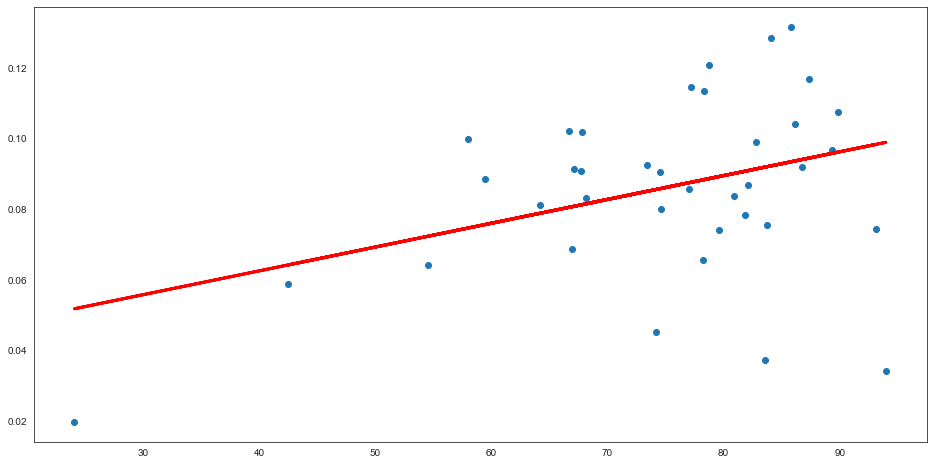

In [48]:
#WHITE

# Split the Dataset into Train and Test
white_train, white_test, infected_train, infected_test = train_test_split(prop_of_white, prop_of_infected, test_size = 0.25)

#CREATE Linear Regression object
linreg = LinearRegression()

#TRAIN Linear Regression model using Train set (proportion of whites in population-predictor, proportion of infected in population-response)
linreg.fit(white_train, infected_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)         #b
print('Coefficients \t: a = ', linreg.coef_)        #a

# FORMULA for Regression line
regline_x = white_train
regline_y = linreg.intercept_ + linreg.coef_ * white_train

# PLOT Linear Regression line based on COEF-INTERCEPT FORM
f = plt.figure(figsize=(16, 8))
plt.scatter(white_train, infected_train) #plot scatter plot
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) #plot red reg line
plt.show() #x-axis: proportion of whites in population (predictor) ; y-axis: proportion of infected in population (response)


**Predict Proportion of Total Infected in population values based on Proportion of White(Train).**

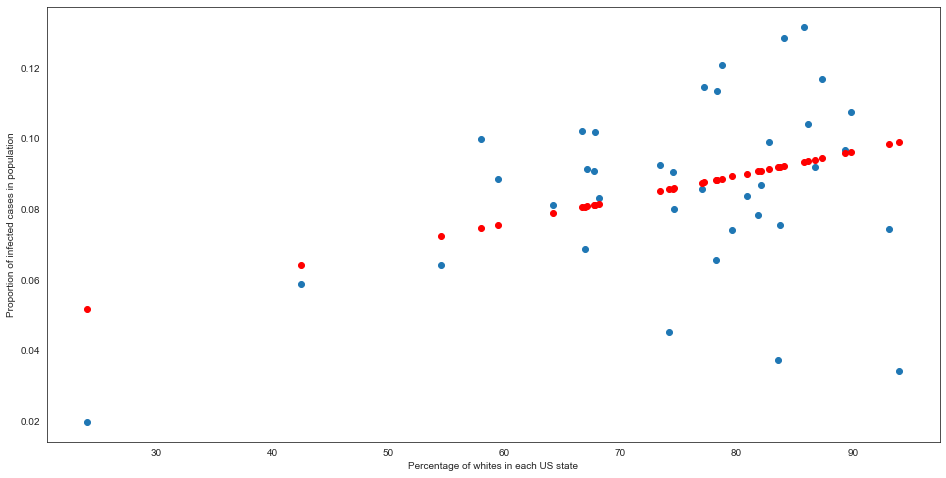

In [49]:
# Predict Proportion of Total Infected (response) values corresponding to Percentage of White (predictor) Train
infected_train_pred = linreg.predict(white_train)


# PLOT Linear Regression line BY PREDICTION USING LINEAR REGRESSION MODEL
f = plt.figure(figsize=(16, 8))
plt.scatter(white_train, infected_train)
plt.scatter(white_train, infected_train_pred, color = "r")

plt.xlabel("Percentage of whites in each US state")
plt.ylabel("Proportion of infected cases in population")

plt.show()

In [50]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(white_train, infected_train))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(white_train, infected_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(white_train, infected_train_pred))
print()

Explained Variance (R^2) 	: 0.1413444790349767
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1413444790349767
Mean Squared Error (MSE) 	: 5763.0657646719355



In [51]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([white_train, infected_train], axis = 1).reindex(white_train.index)
trainDF.corr()

,Percentage_White,Infection_Rate
Percentage_White,1.000000,0.375958
Infection_Rate,0.375958,1.000000


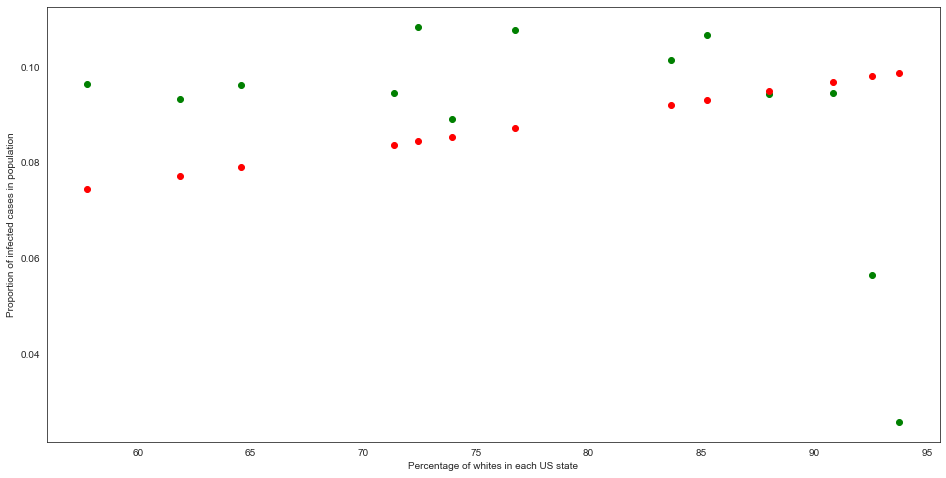

In [52]:
# Predict Proportion of Infected in Population(response) corresponding to Percentage of White(predictor) Test
infected_test_pred = linreg.predict(white_test)


# Plot Linear Regression line BY PREDICTION USING LINEAR REGRESSION MODEL
f = plt.figure(figsize=(16, 8))
plt.scatter(white_test, infected_test, color = "green")
plt.scatter(white_test, infected_test_pred, color = "red")

plt.xlabel("Percentage of whites in each US state")
plt.ylabel("Proportion of infected cases in population")

plt.show()

In [53]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(white_test, infected_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(infected_test, infected_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.4687874704582835
Mean Squared Error (MSE) 	: 0.0007299595294681598



Intercept 	: b =  [0.09365524]
Coefficients 	: a =  [[-0.0002211]]


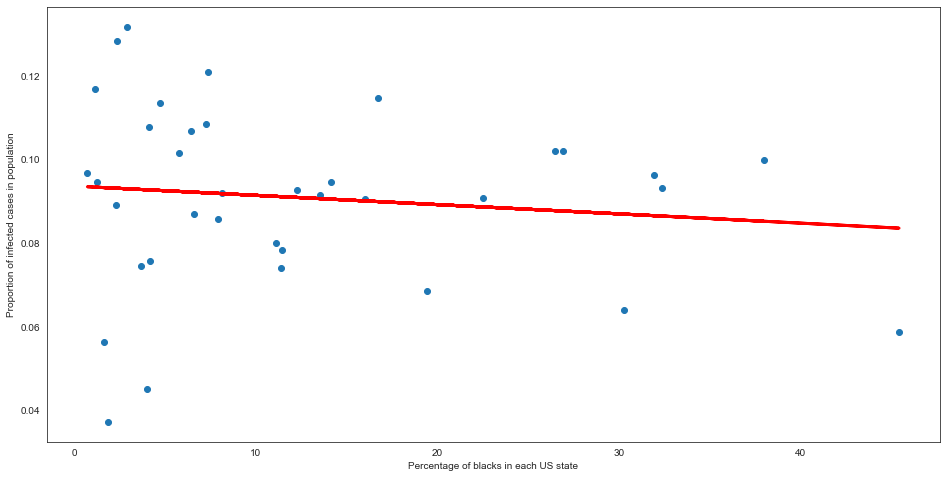

In [54]:
#BLACK

prop_of_infected = pd.DataFrame(popgotcovid['Infection_Rate']) # Response, y
prop_of_black = pd.DataFrame(population['Percentage_Black'])        # Predictor, x

# Split the Dataset into Train and Test
black_train, black_test, infected_train, infected_test = train_test_split(prop_of_black, prop_of_infected, test_size = 0.25)

#CREATE Linear Regression object
linreg = LinearRegression()

#TRAIN Linear Regression model using Train set (proportion of blacks in population-predictor, proportion of infected in population-response)
linreg.fit(black_train, infected_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)         #b
print('Coefficients \t: a = ', linreg.coef_)        #a

# FORMULA for Regression line
regline_x = black_train
regline_y = linreg.intercept_ + linreg.coef_ * black_train

# PLOT Linear Regression line based on COEF-INTERCEPT FORM
f = plt.figure(figsize=(16, 8))
plt.scatter(black_train, infected_train) #plot scatter plot
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) #plot red reg line

plt.xlabel("Percentage of blacks in each US state")
plt.ylabel("Proportion of infected cases in population")
plt.show() #x-axis: proportion of blacks in population (predictor) ; y-axis: proportion of infected in population (response)

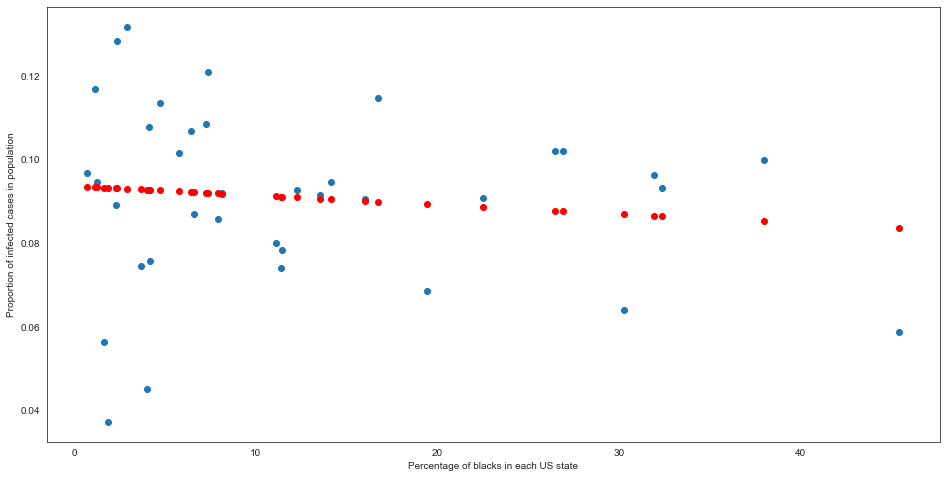

In [55]:
# Predict Proportion of Total Infected (response) values corresponding to Percentage of Black (predictor) Train
infected_train_pred = linreg.predict(black_train)


# PLOT Linear Regression line BY PREDICTION USING LINEAR REGRESSION MODEL
f = plt.figure(figsize=(16, 8))
plt.scatter(black_train, infected_train)
plt.scatter(black_train, infected_train_pred, color = "r")

plt.xlabel("Percentage of blacks in each US state")
plt.ylabel("Proportion of infected cases in population")
plt.show()

In [56]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(black_train, infected_train))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(black_train, infected_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(black_train, infected_train_pred))
print()

Explained Variance (R^2) 	: 0.014411633053658113
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.014411633053658113
Mean Squared Error (MSE) 	: 287.61514839113977



In [57]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([black_train, infected_train], axis = 1).reindex(black_train.index)
trainDF.corr()

,Percentage_Black,Infection_Rate
Percentage_Black,1.000000,-0.120048
Infection_Rate,-0.120048,1.000000


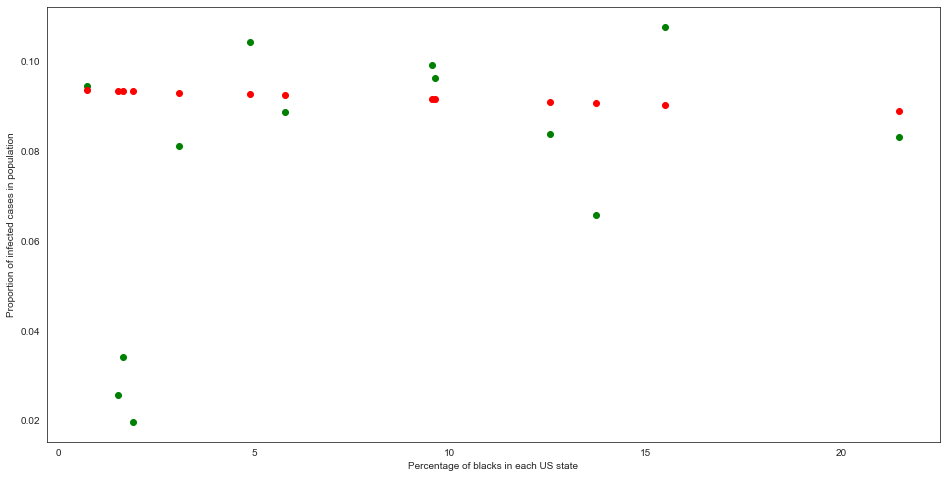

In [58]:
# Predict Proportion of infected in population(response) corresponding to Percentage of Black (predictor) Test
infected_test_pred = linreg.predict(black_test)

# Plot Linear Regression line BY PREDICTION USING LINEAR REGRESSION MODEL
f = plt.figure(figsize=(16, 8))
plt.scatter(black_test, infected_test, color = "green")
plt.scatter(black_test, infected_test_pred, color = "red")

plt.xlabel("Percentage of blacks in each US state")
plt.ylabel("Proportion of infected cases in population")
plt.show()

In [59]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(black_test, infected_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(infected_test, infected_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.35946321145032734
Mean Squared Error (MSE) 	: 0.0011428310165564654



Intercept 	: b =  [0.09774442]
Coefficients 	: a =  [[-0.00204135]]


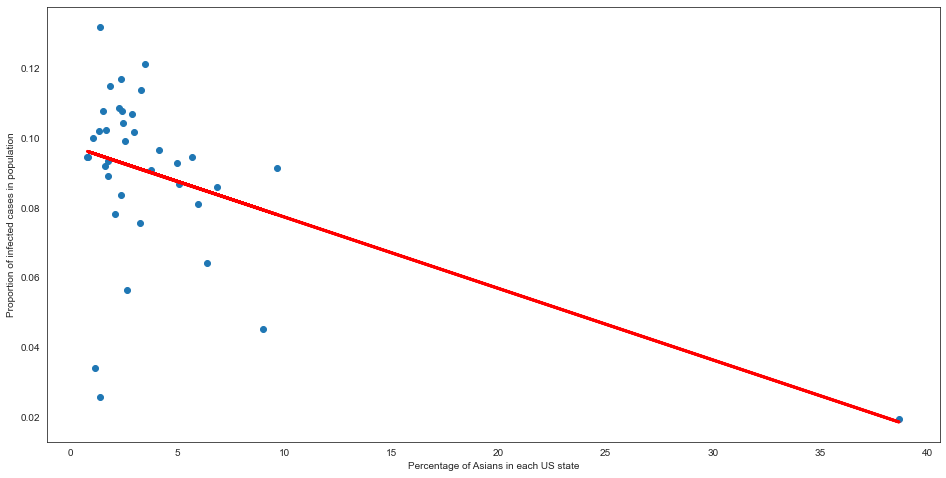

In [60]:
#ASIANS

prop_of_infected = pd.DataFrame(popgotcovid['Infection_Rate'])  # Response, y
prop_of_asian = pd.DataFrame(population['Percentage_Asian'])        # Predictor, x

# Split the Dataset into Train and Test
asian_train, asian_test, infected_train, infected_test = train_test_split(prop_of_asian, prop_of_infected, test_size = 0.25)

#CREATE Linear Regression object
linreg = LinearRegression()

#TRAIN Linear Regression model using Train set (proportion of asians in population-predictor, proportion of infected in population-response)
linreg.fit(asian_train, infected_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)         #b
print('Coefficients \t: a = ', linreg.coef_)        #a

# FORMULA for Regression line
regline_x = asian_train
regline_y = linreg.intercept_ + linreg.coef_ * asian_train

# PLOT Linear Regression line based on COEF-INTERCEPT FORM
f = plt.figure(figsize=(16, 8))
plt.scatter(asian_train, infected_train) #plot scatter plot
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) #plot red reg line

plt.xlabel("Percentage of Asians in each US state")
plt.ylabel("Proportion of infected cases in population")
plt.show() #x-axis: proportion of asians in population (predictor) ; y-axis: proportion of infected in population (response)

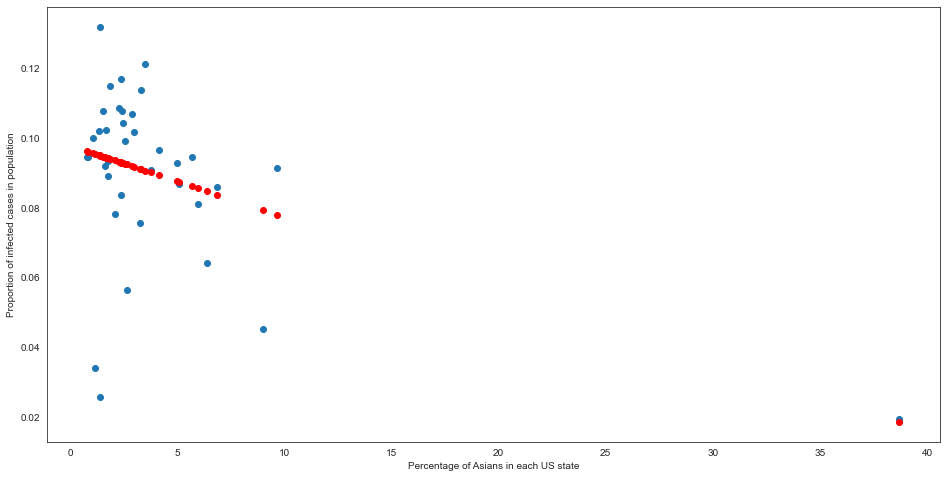

In [61]:
# Predict Proportion of Total Infected (response) values corresponding to Proportion of Asian (predictor) Train
infected_train_pred = linreg.predict(asian_train)


# PLOT Linear Regression line BY PREDICTION USING LINEAR REGRESSION MODEL
f = plt.figure(figsize=(16, 8))
plt.scatter(asian_train, infected_train)
plt.scatter(asian_train, infected_train_pred, color = "r")

plt.xlabel("Percentage of Asians in each US state")
plt.ylabel("Proportion of infected cases in population")
plt.show()

In [62]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(asian_train, infected_train))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(asian_train, infected_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(asian_train, infected_train_pred))
print()

Explained Variance (R^2) 	: 0.2505118467349007
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2505118467349007
Mean Squared Error (MSE) 	: 54.350095953352586



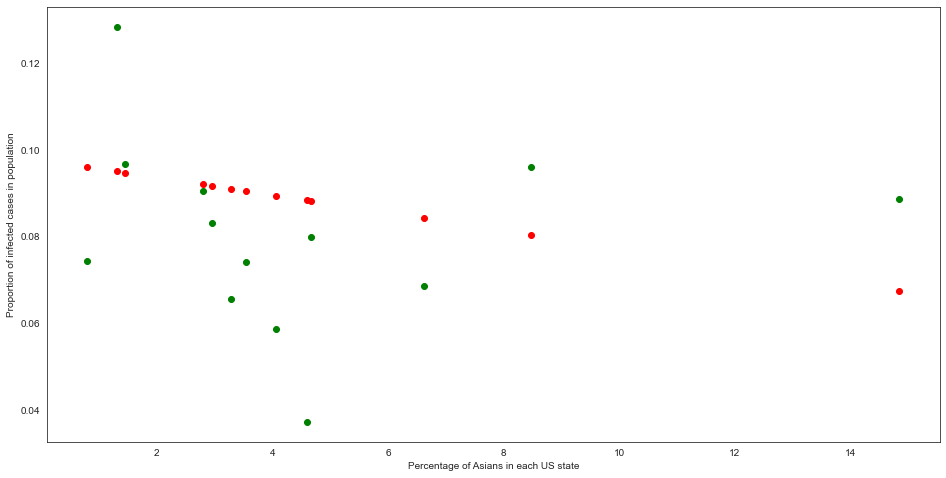

In [63]:
# Predict Proportion of infected in population(response) corresponding to Asians Test(predictor)
infected_test_pred = linreg.predict(asian_test)

# Plot Linear Regression line BY PREDICTION USING LINEAR REGRESSION MODEL
f = plt.figure(figsize=(16, 8))
plt.scatter(asian_test, infected_test, color = "green")
plt.scatter(asian_test, infected_test_pred, color = "red")


plt.xlabel("Percentage of Asians in each US state")
plt.ylabel("Proportion of infected cases in population")
plt.show()

In [64]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([asian_train, infected_train], axis = 1).reindex(asian_train.index)
trainDF.corr()

,Percentage_Asian,Infection_Rate
Percentage_Asian,1.000000,-0.500512
Infection_Rate,-0.500512,1.000000


### Insights from Regression Analysis of Temperature Dataset
Limitation of this prediction: 
- Only 50 data points in total because datasets only consist of information of 50 US states 
Correlation Coefficient: Whites (Positive) > Blacks (Higher negative) > Asians (Lower negative)


## Random Forest Regression on Quarterly Average Temp and Fatality

In [65]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(asian_test, infected_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(infected_test, infected_test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.23815508575507027
Mean Squared Error (MSE) 	: 0.0005483947259889443



In [66]:
x = Mean_Temp.iloc[:, 0:1].values 
y = Mean_Temp.iloc[:, 1].values # Fitting Random Forest Regression to the dataset
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

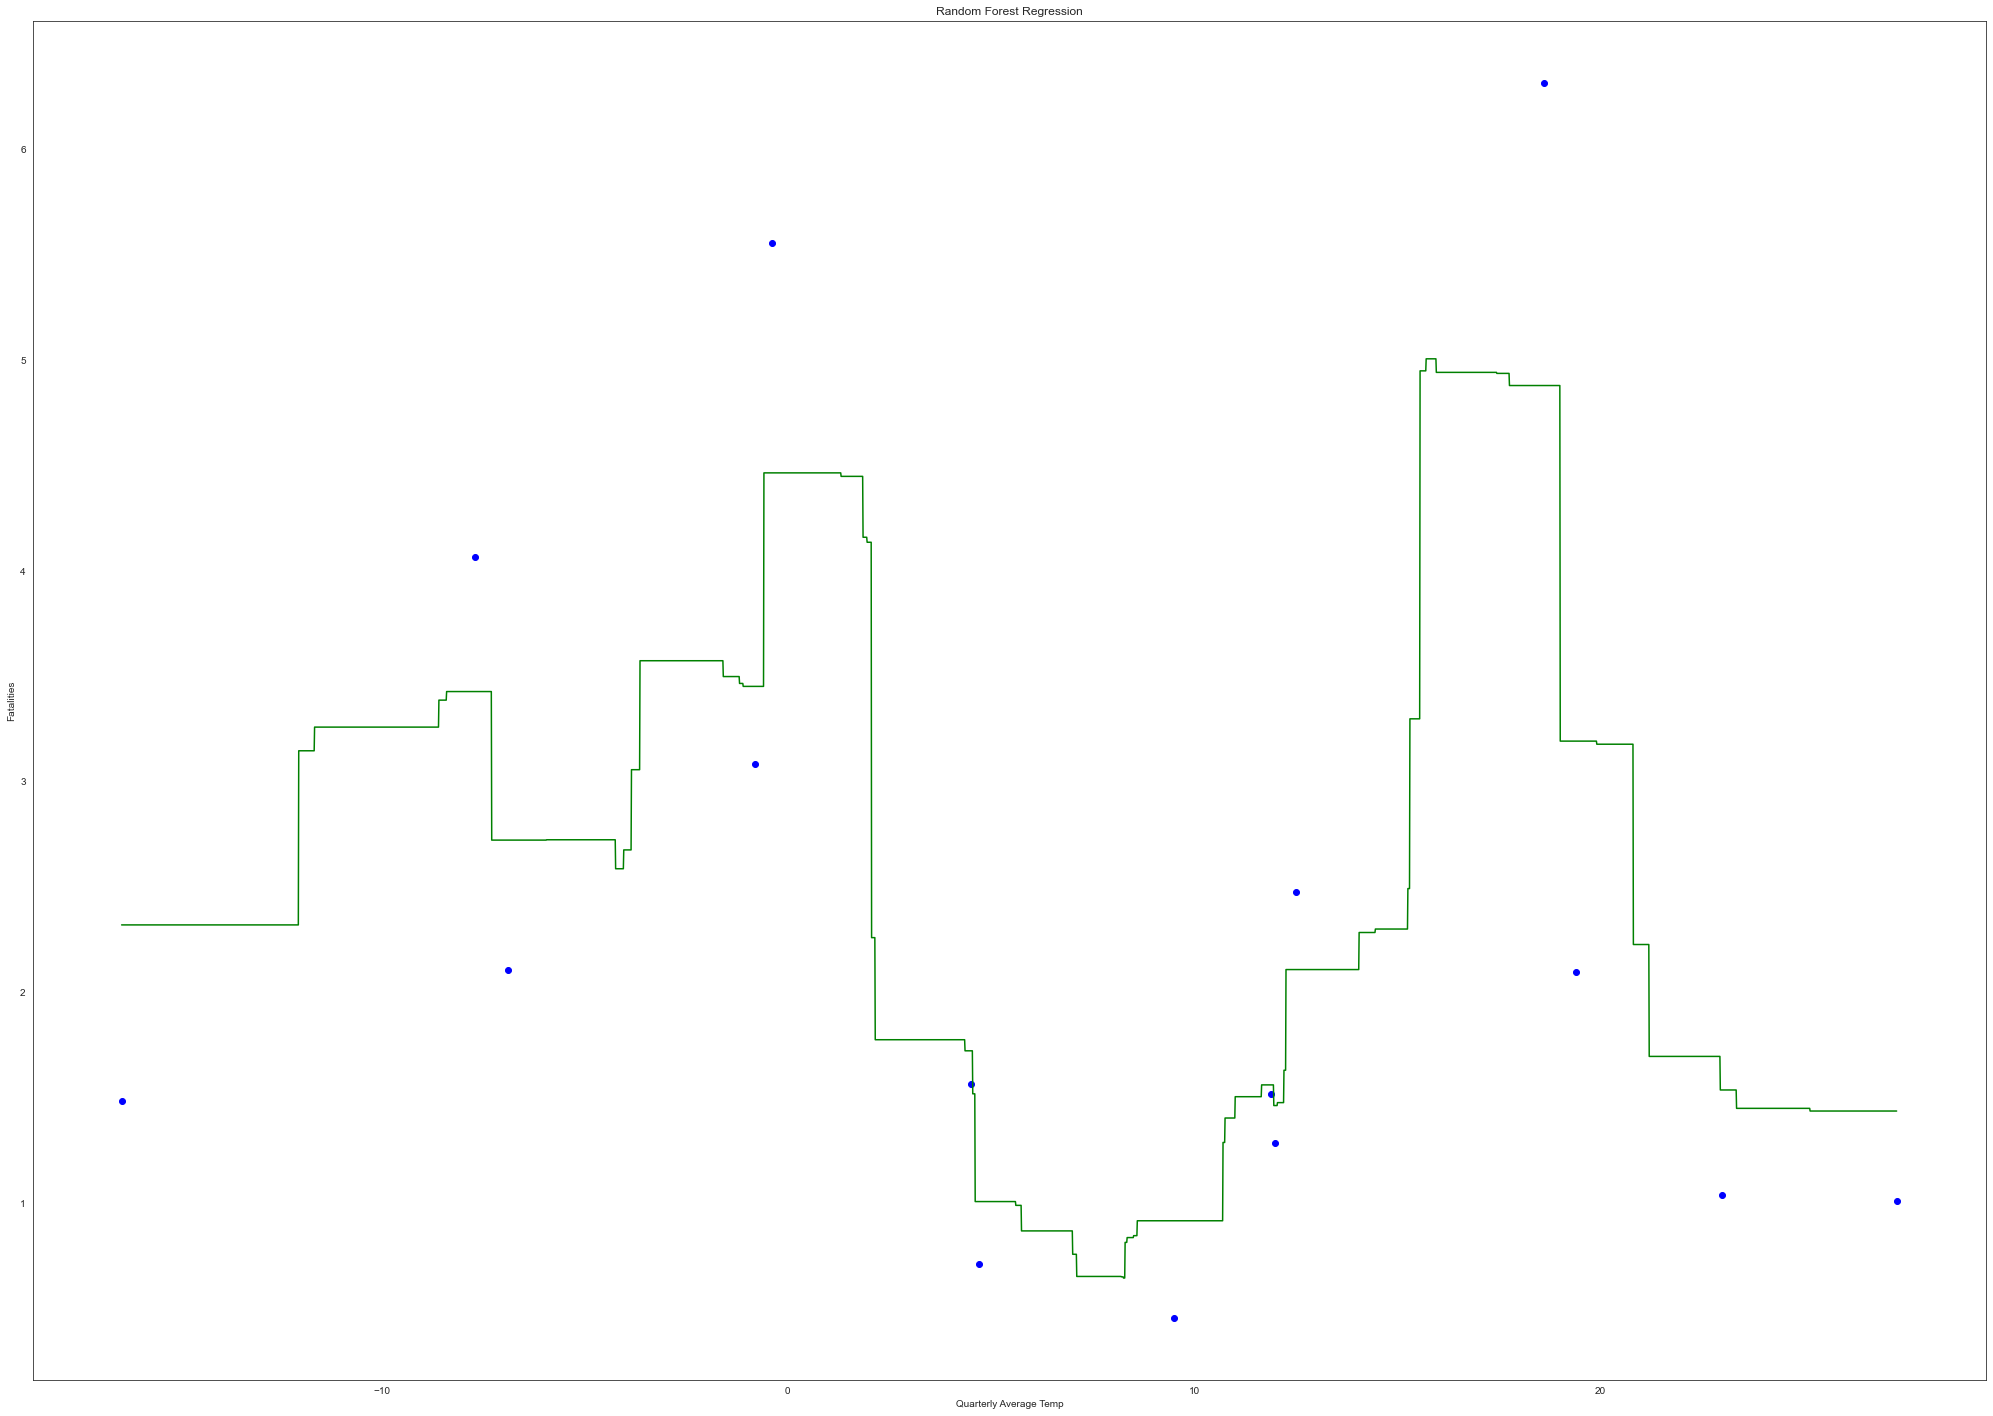

In [67]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Quarterly Average Temp')
plt.ylabel('Fatalities')
plt.show()

### Insights from Regression Analysis of Temperature Dataset
- The data points along with the regression line indicate a positive relationship
- Limitation: Very few data points(15) used, regression not accurate
- Can be improved if more temperature data across longer period of time  was used


## Final Overall Insights
Significance of factors in affecting COVID-19 infection and fatality rate 
- Hospital occupancy > Racial demographics > Temperature

## Recommendations
- US states with a less *negative correlation coefficient* for hospital occupancy and death rate step up their hospital expansion efforts
- Increase allocation of resources towards isolation facilities for COVID-19 facilities
- Equal healthcare treatment and access to isolation facilities for all races as *certain races, such as the Whites, are more susceptible to covid-19 than the others*.  
